## <a id='toc1_1_'></a>[SAFARIDINE & STAY: KENYA'S CULINARY AND LODGING NAVIGATOR](#toc0_)

<img src="project_pic.jpg" alt="SafariDine" width="100%" height="550" align="center">

  **Table of contents**<a id='toc0_'></a>    
- [SAFARIDINE & STAY: KENYA'S CULINARY AND LODGING NAVIGATOR](#toc1_1_)    
- [Authors](#toc2_)    
- [INTRODUCTION](#toc3_)    
- [BUSINESS UNDERSTANDING](#toc4_)    
  - [PROBLEM STATEMENT](#toc4_1_)    
- [DATA UNDERSTANDING](#toc5_)    
    - [Reading The datasets](#toc5_1_1_)    
- [DATA CLEANING](#toc6_)    
    - [Data Cleaning - Restaurants](#toc6_1_1_)    
    - [Data Cleaning - Hotels](#toc6_1_2_)    
- [EXPLORATORY DATA ANALYSIS](#toc7_)    
    - [Map for Hotels and Restaurants in Kenya](#toc7_1_1_)    
    - [Heat Map](#toc7_1_2_)    
    - [Correlation between final data Variables](#toc7_1_3_)    
    - [Regional Ratings Comparison for Restaurants:](#toc7_1_4_)    
    - [Distribution of Hotels and Restaurants Across Towns (Top 20)](#toc7_1_5_)    
    - [Distribution of Ratings for Hotels and Restaurants](#toc7_1_6_)    
    - [Comparison of Word Clouds for Hotels and Restaurants by Rating:](#toc7_1_7_)    
    - [Visualizing Distribution of Cuisine](#toc7_1_8_)    
    - [Distribution of Hotel and Restaurant Prices](#toc7_1_9_)    
    - [Check for Price Correlation](#toc7_1_10_)    
    - [Regional Price Comparison](#toc7_1_11_)    
    - [Visualizing Top Towns by Province](#toc7_1_12_)    
- [MODELLING](#toc8_)    
    - [Recommender system based only on Towns and ratings about the hotel](#toc8_1_1_)    
    - [Requirement And special needs based Recommender](#toc8_1_2_)    
- [CONCLUSIONS](#toc9_)    
- [RECOMMENDATIONS](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

*Discover the Flavors of Kenya*

Welcome to SafariDine & Stay, where we bring you the ultimate culinary and lodging exploration in Kenya. Our platform includes two indispensable components:

1. **Flavors of Kenya: The Restaurant Recommender**
   - A recommender system that gives tourists the best match for their preferences in Kenya's vibrant culinary scene.

2. **Lodging Luxe: The Hotel Guide**
   - An invaluable hotel guide to help travelers find the perfect place to stay during their Kenyan adventure.

Together, these components create a comprehensive guide for travelers, ensuring unforgettable dining experiences and comfortable stays in the heart of Kenya


# <a id='toc2_'></a>[Authors](#toc0_)
- [Ivan Kibet]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/master')
- [Maurice Njogu]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/maurice')
- [Victor Mwatu]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/Victor')
- [Stanoff Kipkirui]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/Stanoff')
- [Martin Dudi]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/DUDI')
- [Peter Kariuki]('https://github.com/Ivan3864/Flavors-of-Kenya-The-Restaurant-Recommender/tree/Peter-Kariuki')

# <a id='toc3_'></a>[INTRODUCTION](#toc0_)
In the diverse culinary and hospitality landscape of Kenya, exploring the vibrant tapestry of flavors and finding the perfect place to stay is a journey in itself. Local and international travelers often face challenges planning a satisfying trip within their budget and time constraints. Kenya offers a rich array of culinary experiences and lodging options, from aromatic coastal dishes to cozy highland retreats. To ensure that every visitor's palate is delighted, and their stay is comfortable, we introduce "SafariDine & Stay: Kenya's Culinary and Lodging Navigator" – a tailored guide designed to match both local and international tourists' preferences with the finest dining experiences and accommodations in various towns in Kenya.

This innovative system harnesses the power of data and advanced machine learning algorithms to curate personalized recommendations for discerning travelers. By understanding individual tastes, budget considerations, and location preferences, SafariDine & Stay endeavors to elevate the dining and lodging experience, making each meal and night's stay an unforgettable adventure.

In this project, we embark on a journey to craft a seamless fusion of technology and gastronomy, and comfort. From data collection and model development to user interface design and continuous refinement, our goal is to create a user-centric platform that not only simplifies restaurant and hotel selection but also amplifies the joy of discovery. Through this endeavor, our primary goal as the 'SafariDine & Stay' group is to celebrate the diversity of Kenyan cuisine and hospitality and foster a deeper connection between travelers and the vibrant food culture and lodging options of this enchanting nation. Join us on this gastronomic and comfortable odyssey, as we endeavor to serve up the perfect plate and a cozy bed for every palate and traveler's dream.




# <a id='toc4_'></a>[BUSINESS UNDERSTANDING](#toc0_)
## <a id='toc4_1_'></a>[PROBLEM STATEMENT](#toc0_)
**Problem Description:**

In Kenya, where cultural diversity meets breathtaking landscapes, the rich culinary tapestry and diverse lodging options are hidden treasures. However, tourists, both local and international, often find themselves lost amidst the multitude of dining choices and unsure about where to stay. The absence of a personalized dining and lodging guide leads to missed opportunities to savor authentic Kenyan cuisines and experience comfortable stays.

This problem can be encapsulated as:

` Tourists in Kenya face the challenge of finding restaurants and hotels that align with their dining and lodging preferences, budget limitations, and desired locations. This results in subpar dining experiences and uncomfortable stays, ultimately hindering overall trip satisfaction. `

A Restaurant and Hotel Recommender System is a technology-driven solution designed to assist customers in finding dining establishments and lodging options that match their preferences and needs. It leverages data analysis and algorithms to suggest restaurants and hotels that align with the user's taste, location, budget, and style of cooking. This system enhances the dining and lodging experience for customers and can provide significant benefits to restaurant and hotel owners.

**Key Components:** A Restaurant and Hotel Recommender System typically comprises the following key components:

1. **User Profile:** Collects user data, including dining and lodging preferences, location, budget, and restaurant and hotel ratings.

2. **Restaurant and Hotel Databases:** Store information on various restaurants and hotels, including menus, cuisines, location, ratings, reviews, and pricing.

3. **Recommendation Engine:** Employs machine learning algorithms to analyze user profiles and restaurant and hotel data to generate personalized recommendations.

4. **User Interface:** Provides a user-friendly interface, such as a mobile app or website, for users to interact with the system.

**Business Benefits:** Implementing a Restaurant and Hotel Recommender System can offer several advantages for both customers and restaurant and hotel owners:

- **Improved Customer Experience:** Customers receive tailored restaurant and hotel recommendations based on their preferences, leading to higher satisfaction and loyalty.

- **Increased Revenue:** By suggesting relevant restaurants and promoting special offers, the system can drive more bookings and orders for both dining and lodging establishments.

- **Enhanced Operational Efficiency:** The system can optimize table allocation, predict demand, and manage room bookings, helping restaurants and hotels improve service quality and reduce wait times.

- **Data Insights:** Restaurants and hotels can gain valuable insights into customer preferences and behaviors, allowing for data-driven menu adjustments, marketing strategies, and room pricing.

**Target Audience:** The primary target audience for a Restaurant and Hotel Recommender System includes:

- **Travelers:** Individuals looking for restaurant and hotel suggestions based on their preferences for dining and lodging.

- **Restaurant and Hotel Owners/Managers:** Seeking to boost their customer base and operational efficiency in both dining and lodging services.

- **Marketers:** Interested in leveraging customer data for targeted promotions and campaigns to enhance both dining and lodging experiences.

**Challenges and Risks:** Some challenges and risks associated with implementing a Restaurant and Hotel Recommender System include the need for accurate data, algorithm bias, competition in the restaurant and hotel recommendation space, and ensuring data privacy.

**Future Opportunities:** Future opportunities for a Restaurant and Hotel Recommender System may include incorporating advanced AI and machine learning techniques, integrating with emerging technologies like augmented reality (AR), and expanding into international markets to offer dining and lodging recommendations worldwide.

In conclusion, SafariDine & Stay has the potential to revolutionize the dining and lodging experience for customers and boost the profitability of restaurants and hotels in Kenya. By leveraging data and technology, it can provide personalized recommendations that enhance customer satisfaction and drive business growth in both the culinary and lodging domains.



# <a id='toc5_'></a>[DATA UNDERSTANDING](#toc0_)

**Merging Restaurant and Hotel Data**

For SafariDine & Stay, we've combined two essential datasets to offer a complete travel experience in Kenya. We've seamlessly merged restaurant and hotel data to provide you with the best of both worlds. Whether you're looking for delectable dining options or comfortable accommodations, we've got you covered.

**Data Sources:**
The data used in this project has been sourced from two reputable platforms:

1. **TripAdvisor:** [TripAdvisor]('https://www.tripadvisor.in/') is a widely recognized platform for travel-related information and user reviews. The restaurant data in our dataset has been collected from TripAdvisor, ensuring that you receive insights based on real traveler experiences and ratings.

2. **Booking.com:** [Booking.com]('https://www.booking.com/') is a trusted platform for hotel bookings and reviews. The hotel data in our dataset has been sourced from Booking.com, offering you a selection of diverse hotels with real guest reviews and ratings.

**Column Descriptions for the Combined Dataset:**

1. `id`: A unique identifier for each establishment.
2. `category`: Indicates whether the entry is a restaurant or hotel.
3. `name`: The name of the restaurant or hotel.
4. `latitude`: The geographical latitude coordinates of the establishment.
5. `longitude`: The geographical longitude coordinates of the establishment.
6. `rating`: The average rating of the establishment based on user reviews.
7. `numberOfReviews`: The total number of reviews received by the establishment.
8. `lowerPrice`: The lower price range for dining or staying at the establishment.
9. `upperPrice`: The upper price range for dining or staying at the establishment.
10. `rawRanking`: A ranking score reflecting the establishment's popularity or quality.
11. `website`: The website URL for the restaurant or hotel (if available).
12. `cuisine`: The type of cuisine offered by the restaurant (for restaurants only).
13. `features`: Special features or amenities offered by the establishment.
14. `phone`: Contact phone number for inquiries or reservations.
15. `locationString`: The location description of the establishment.
16. `Town`: the location of the restaurant/hotel

In [60]:
# Importing relevant libraries
import pandas as pd  # For data manipulation and analysis
import os  # For operating system-related functions
import matplotlib.pyplot as plt  # For creating data visualizations
import seaborn as sns  # For enhanced data visualization
import numpy as np  # For numerical computations
from wordcloud import WordCloud  # For generating word clouds
import warnings  # For managing warnings
import folium 
# Ignore future deprecation warnings
warnings.filterwarnings("ignore")

# Importing libraries for statistical analysis and text processing
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For checking multicollinearity
from nltk.corpus import stopwords  # For common stop words
from nltk.stem import WordNetLemmatizer  # For word lemmatization
from nltk.tokenize import word_tokenize  # For word tokenization
from math import sin, cos, sqrt, atan2, radians  # For geospatial calculations
from folium.plugins import HeatMap 

# Importing libraries for text processing and modeling
from sklearn.feature_extraction.text import TfidfVectorizer  # For TF-IDF vectorization of text data
from sklearn.neighbors import NearestNeighbors  # For nearest neighbors search
from surprise import Dataset, Reader  # For building recommendation systems
from surprise.model_selection import cross_validate  # For model evaluation
from surprise.prediction_algorithms import SVD  # For Singular Value Decomposition-based recommendation

# Download NLTK resources
import nltk

# Importing additional libraries for modeling and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For regression model evaluation

### <a id='toc5_1_1_'></a>[Reading The datasets](#toc0_)

In [61]:
data_files = ["Athi_river.csv","Bomet.csv","eldoret.csv","Gede_coast.csv","Kakamega_west.csv","Kericho.csv","Kiambu.csv","Kilifi.csv","kiserian.csv",
 "Kisumu.csv","Kitale.csv","Kitengela.csv","Kwale.csv","Lake Elementaita.csv","lake_nakuru_national_park.csv","Lamu.csv","Malindi.csv",
 "matuu.csv","mombasa.csv","mount_kenya_region.csv","Mtwapa_coast.csv","Nairobi.csv","Nanyuki.csv","Narok_rift.csv","ngong.csv","Nyahururu.csv","Nyeri.csv",
 "ruaka.csv","shela_Lamu.csv","siaya.csv","Ukunda_coast.csv","Watamu.csv"]

In [62]:
# Specify the folder where your datasets are located
folder_path = 'datasets/'

# Get a list of CSV files in the folder
data_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create an empty list to store individual DataFrames
dfs = []

# Iterate through the list of CSV files and read each file into a DataFrame
for file in data_files:
    df = pd.read_csv(file, encoding='ISO-8859-1')

    dfs.append(df)

# Combine all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
# Define a function to combine columns starting with a specific prefix
def combine_columns(row, prefix):
    columns = [col for col in row.index if col.startswith(prefix)]
    return ', '.join(row[columns].dropna())

# Apply the function to create the 'cuisine', 'dishes', and 'features' columns
combined_df['cuisine'] = combined_df.apply(lambda x: combine_columns(x, 'cuisines'), axis=1)
combined_df['dishes'] = combined_df.apply(lambda x: combine_columns(x, 'dishes'), axis=1)
combined_df['features'] = combined_df.apply(lambda x: combine_columns(x, 'features'), axis=1)

# Reorder columns as per your requirement
desired_columns = ['id', 'name','latitude', 'longitude', 'rating', 'numberOfReviews', 'priceRange', 'rawRanking', 'website', 
                   'cuisine', 'dishes', 'features', 'phone', 'rankingString', 'locationString']
combined_df = combined_df[desired_columns]

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)

In [63]:
data = pd.read_csv("combined_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3889 non-null   float64
 1   name             3883 non-null   object 
 2   latitude         3761 non-null   float64
 3   longitude        3802 non-null   float64
 4   rating           3436 non-null   float64
 5   numberOfReviews  3893 non-null   int64  
 6   priceRange       1298 non-null   object 
 7   rawRanking       3411 non-null   float64
 8   website          2780 non-null   object 
 9   cuisine          3292 non-null   object 
 10  dishes           970 non-null    object 
 11  features         2294 non-null   object 
 12  phone            3330 non-null   object 
 13  rankingString    2683 non-null   object 
 14  locationString   3701 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 456.3+ KB


# <a id='toc6_'></a>[DATA CLEANING](#toc0_)

### <a id='toc6_1_1_'></a>[Data Cleaning - Restaurants](#toc0_)

In [64]:
# Data Cleaning - Restaurants
# Remove duplicates based on 'id' column
data = data.drop_duplicates(subset=['id'])
data.reset_index(drop=True, inplace=True)

# Drop rows with missing values in 'id' and 'name' columns
data.dropna(subset=['id', 'name'], inplace=True)

# Calculate the mean of the 'rating' column and fill missing ratings with the mean
mean_rating = data['rating'].mean()
data['rating'].fillna(mean_rating, inplace=True)

# Calculate the median of the 'rawRanking' column and fill missing 'rawRanking' values with the median
median_raw_ranking = data['rawRanking'].median()
data['rawRanking'].fillna(median_raw_ranking, inplace=True)

# Fill missing 'website' values with 'No Website'
data['website'].fillna('No Website', inplace=True)

# Fill missing 'cuisine' values with 'Kenyan'
data['cuisine'].fillna('Kenyan', inplace=True)

# Remove the 'dishes' column
data.drop('dishes', axis=1, inplace=True)

# Fill missing values in 'features' column with 'seating'
data['features'].fillna('seating', inplace=True)


In [66]:
# Split the locationString and extract the first part
data['locationString'].fillna('Diani Beach, Ukunda, Coast Province', inplace=True)

data['town'] = data['locationString'].str.split(',').str[0]

# Display the unique town names
unique_town_names = data['town'].unique()
print(unique_town_names)

['Nairobi' 'Kitengela' 'Karen' 'Syokimau' 'Athi River' 'Bomet' 'Eldoret'
 'Watamu' 'Malindi' 'Kikambala' 'Malindi Marine National Park' 'Kakamega'
 'Nairobi Region' 'Kiambu' 'Lavington' 'Thika' 'Narok' 'Ruaka' 'Nyeri'
 'Langata' 'Kilifi' 'Ngong' 'Kiserian' 'Ongata Rongai' 'Kahawa' 'Mombasa'
 'Shanzu' 'Bamburi' 'Mtwapa' 'Likoni' 'Kitale' 'Kwale' 'Tiwi'
 'Lake Elementaita' 'Nakuru' 'Lake Nakuru National Park' 'Lamu Island'
 'Shela' 'Matuu' 'Masii' 'Mtito Andei' 'Nanyuki Town' 'Nyahururu' 'Kikuyu'
 'Limuru' 'Siaya' 'Juja' 'Diani Beach' 'Ukunda']


In [67]:
# Define a function to add 'seating' to the 'features' column if missing
def add_seating_feature(features):
    if pd.isnull(features):
        return 'seating'
    elif 'seating' not in features:
        return features + ', seating'
    else:
        return features

# Apply the function to the 'features' column
data['features'] = data['features'].apply(add_seating_feature)

# Replace missing phone numbers with "No Phone Number"
data['phone'].fillna('No Phone Number', inplace=True)

# Define a function to split the price range and keep the currency symbol
def split_price_range(price_range):
    if pd.notna(price_range):
        parts = price_range.split(' - ')
        if len(parts) == 2:
            lower_price = parts[0]
            upper_price = parts[1]
        else:
            lower_price = None
            upper_price = None
    else:
        lower_price = None
        upper_price = None
    return lower_price, upper_price

# Apply the function to the 'priceRange' column
data[['lowerPrice', 'upperPrice']] = data['priceRange'].apply(lambda x: pd.Series(split_price_range(x)))

# Remove leading and trailing whitespaces in the new columns
data['lowerPrice'] = data['lowerPrice'].str.strip()
data['upperPrice'] = data['upperPrice'].str.strip()

# Define a function to clean and convert values
def clean_and_convert_values(value):
    if pd.notna(value):
        cleaned_value = value.replace('KESÂ', '').replace('KES', '').replace(',', '').strip()
        if '$' in cleaned_value:
            cleaned_value = cleaned_value.replace('$', '')
            return round(float(cleaned_value) * 148.75, 2)
        else:
            return round(float(cleaned_value), 2)
    else:
        return None

# Apply the function to the columns you want to clean and convert
columns_to_clean = ['lowerPrice', 'upperPrice']
for column in columns_to_clean:
    data[column] = data[column].apply(clean_and_convert_values)

# Calculate the median for 'lowerPrice' and 'upperPrice' columns
median_lower_price = data['lowerPrice'].median()
median_upper_price = data['upperPrice'].median()

# Fill missing values with the respective medians
data['lowerPrice'].fillna(median_lower_price, inplace=True)
data['upperPrice'].fillna(median_upper_price, inplace=True)

# Rearrange the columns
data = data[['id', 'name', 'latitude', 'longitude', 'rating', 'numberOfReviews', 
             'lowerPrice', 'upperPrice', 'rawRanking', 'website', 'cuisine', 'features', 'phone', 'locationString', 'town']]

# Drop the 'priceRange' column if it still exists
if 'priceRange' in data.columns:
    data.drop('priceRange', axis=1, inplace=True)

In [68]:
town_coordinates = {
    'Nairobi': {'latitude': -1.290, 'longitude': 36.820},
    'Kitengela': {'latitude': -1.456, 'longitude': 36.977},
    'Karen': {'latitude': -1.329, 'longitude': 36.715},
    'Syokimau': {'latitude': -1.368, 'longitude': 36.948},
    'Athi River': {'latitude': -1.452, 'longitude': 36.984},
    'Bomet': {'latitude': -0.781, 'longitude': 35.341},
    'Eldoret': {'latitude': 0.520, 'longitude': 35.270},
    'Watamu': {'latitude': -3.354, 'longitude': 40.008},
    'Malindi': {'latitude': -3.217, 'longitude': 40.119},
    'Kikambala': {'latitude': -3.896, 'longitude': 39.123},
    'Malindi Marine National Park': {'latitude': -3.285, 'longitude': 40.123},
    'Kakamega': {'latitude': 0.290, 'longitude': 34.730},
    'Kericho': {'latitude': -0.360, 'longitude': 35.280},
    'Nairobi Region': {'latitude': -1.292, 'longitude': 36.821},
    'Kiambu': {'latitude': -1.165, 'longitude': 36.835},
    'Lavington': {'latitude': -1.285, 'longitude': 36.774},
    'Thika': {'latitude': -1.036, 'longitude': 37.067},
    'Narok': {'latitude': -1.081, 'longitude': 35.871},
    'Ruaka': {'latitude': -1.196, 'longitude': 36.778},
    'Nyeri': {'latitude': -0.420, 'longitude': 36.951},
    'Langata': {'latitude': -1.329, 'longitude': 36.784},
    'Kilifi': {'latitude': -3.635, 'longitude': 39.849},
    'Ngong': {'latitude': -1.356, 'longitude': 36.651},
    'Kiserian': {'latitude': -1.419, 'longitude': 36.652},
    'Ongata Rongai': {'latitude': -1.390, 'longitude': 36.765},
    'Kahawa': {'latitude': -1.176, 'longitude': 36.945},
    'Mombasa': {'latitude': -4.043, 'longitude': 39.668},
    'Shanzu': {'latitude': -3.979, 'longitude': 39.754},
    'Bamburi': {'latitude': -3.975, 'longitude': 39.747},
    'Mtwapa': {'latitude': -3.948, 'longitude': 39.747},
    'Likoni': {'latitude': -4.070, 'longitude': 39.691},
    'Kitale': {'latitude': 1.015, 'longitude': 35.006},
    'Kwale': {'latitude': -4.173, 'longitude': 39.449},
    'Tiwi': {'latitude': -4.233, 'longitude': 39.173},
    'Lake Elementaita': {'latitude': -0.812, 'longitude': 36.309},
    'Nakuru': {'latitude': -0.280, 'longitude': 36.070},
    'Lake Nakuru National Park': {'latitude': -0.367, 'longitude': 36.078},
    'Lamu Island': {'latitude': -2.271, 'longitude': 40.897},
    'Shela': {'latitude': -2.279, 'longitude': 40.899},
    'Matuu': {'latitude': -1.486, 'longitude': 37.883},
    'Masii': {'latitude': -1.515, 'longitude': 37.855},
    'Mtito Andei': {'latitude': -2.705, 'longitude': 38.169},
    'Ukunda': {'latitude': -4.293, 'longitude': 39.570},
    'Nanyuki Town': {'latitude': 0.018, 'longitude': 37.072},
    'Nyahururu': {'latitude': 0.040, 'longitude': 36.361},
    'Kikuyu': {'latitude': -1.257, 'longitude': 36.676},
    'Limuru': {'latitude': -1.106, 'longitude': 36.652},
    'Siaya': {'latitude': 0.060, 'longitude': 34.290},
    'Juja': {'latitude': -1.100, 'longitude': 37.034},
    'Diani Beach': {'latitude': -4.282, 'longitude': 39.589}}
# Define a function to fill coordinates based on town
def fill_coordinates(row):
    town = row['town']
    if town in town_coordinates:
        row['latitude'] = town_coordinates[town]['latitude']
        row['longitude'] = town_coordinates[town]['longitude']
    return row

# Apply the function to fill coordinates
data = data.apply(fill_coordinates, axis=1)

### <a id='toc6_1_2_'></a>[Data Cleaning - Hotels](#toc0_)

In [69]:
# Data Cleaning - Hotels
hotels = pd.read_csv("hotels_data.csv")
# Change 'id' column to int64
data['id'] = data['id'].astype('int64')

# Drop rows with missing values in 'latitude' and 'longitude' columns
hotels.dropna(subset=['latitude', 'longitude'], inplace=True)

# Calculate the mean of the 'rating' column and fill missing ratings with the mean
mean_rating2 = hotels['rating'].mean()
hotels['rating'].fillna(mean_rating2, inplace=True)

# Calculate the median of the 'rawRanking' column and fill missing 'rawRanking' values with the median
median_raw_ranking2 = hotels['rawRanking'].median()
hotels['rawRanking'].fillna(median_raw_ranking2, inplace=True)

# Fill missing 'website' values with 'No Website'
hotels['website'].fillna('No Website', inplace=True)

# Fill missing 'cuisine' values with 'N/A'
hotels['cuisine'].fillna('N/A', inplace=True)

# Fill missing values in 'features' column with a default value
hotels['features'].fillna('Room service, Free Internet, Free parking, Restaurant, Bar/Lounge', inplace=True)

# Replace missing phone numbers with "No Phone Number"
hotels['phone'].fillna('No Phone Number', inplace=True)

# Extract 'town' from 'locationString'
hotels['town'] = hotels['locationString'].str.split(',').str[0]
# Define hotel town coordinates


In [70]:
# Define hotel town coordinates
hotel_town_coordinates = {

    'Mombasa': {'latitude': -4.040, 'longitude': 39.660},
    'Watamu': {'latitude': -3.210, 'longitude': 40.100},
    'Nakuru': {'latitude': -0.280, 'longitude': 36.070},
    'Naivasha': {'latitude': -0.710, 'longitude': 36.430},
    'Maasai Mara National Reserve': {'latitude': -1.2921, 'longitude': 35.5353},
    'Nairobi': {'latitude': -1.290, 'longitude': 36.820},
    'Sekenani': {'latitude': -1.4081, 'longitude': 35.1428},
    'Kisumu': {'latitude': -0.090, 'longitude': 34.750},
    'Malindi': {'latitude': -3.220, 'longitude': 40.120},
    'Mambrui': {'latitude': -3.110, 'longitude': 40.140},
    'Eldoret': {'latitude': 0.520, 'longitude': 35.270},
    'Bamburi': {'latitude': -4.0360, 'longitude': 39.6720},
    'Diani Beach': {'latitude': -4.2742, 'longitude': 39.5942},
    'Shanzu': {'latitude': -3.9754, 'longitude': 39.7431},
    'Shela': {'latitude': -2.280, 'longitude': 40.900},
    'Narok': {'latitude': -1.0672, 'longitude': 35.8720},
    'Lamu Island': {'latitude': -2.2674, 'longitude': 40.9023},
    'Nyeri': {'latitude': -0.4210, 'longitude': 36.9482},
    'Nanyuki Town': {'latitude': 0.0236, 'longitude': 37.0741},
    'Nanyuki Municipality': {'latitude': 0.0193, 'longitude': 37.0733},
    'Mtwapa': {'latitude': -3.9472, 'longitude': 39.7567},
    'Embu': {'latitude': -0.5143, 'longitude': 37.4508},
    'Meru Town': {'latitude': 0.0521, 'longitude': 37.6481},
    'Kisii': {'latitude': -0.6833, 'longitude': 34.7667},
    'Karen': {'latitude': -1.3151, 'longitude': 36.7508},
    'Ukunda': {'latitude': -4.2813, 'longitude': 39.5770},
    'Thika': {'latitude': -1.0333, 'longitude': 37.0672},
    'Machakos': {'latitude': -1.5122, 'longitude': 37.2638},
    'Naboisho Conservancy': {'latitude': -1.2000, 'longitude': 35.4000},
    'Ololaimutiek': {'latitude': -1.2500, 'longitude': 35.2167},
    'Syokimau': {'latitude': -1.3513, 'longitude': 36.9275},
    'Langata': {'latitude': -1.3650, 'longitude': 36.7500},
    'Kitale': {'latitude': 1.0341, 'longitude': 34.9888},
    'Kajiado': {'latitude': -1.8500, 'longitude': 36.7833},
    'Migori': {'latitude': -1.0650, 'longitude': 34.4667},
    'Tsavo National Park West': {'latitude': -3.3656, 'longitude': 38.5561},
    'Kilifi': {'latitude': -3.6333, 'longitude': 39.8500},
    'Ruiru': {'latitude': -1.1417, 'longitude': 36.9569},
    'Bungoma': {'latitude': 0.5700, 'longitude': 34.5600},
    'Nyahururu': {'latitude': 0.0333, 'longitude': 36.3500},
    'Isiolo': {'latitude': 0.3546, 'longitude': 37.5822},
    'Athi River': {'latitude': -1.4550, 'longitude': 36.9822},
    'Kericho': {'latitude': -0.3616, 'longitude': 35.2765},
    'Tsavo': {'latitude': -2.5172, 'longitude': 38.4872},
    'Gilgil': {'latitude': -0.5861, 'longitude': 36.2731},
    'Galu Beach': {'latitude': -4.5419, 'longitude': 39.3100},
    'Siaya': {'latitude': 0.0600, 'longitude': 34.2900},
    'Voi': {'latitude': -3.3853, 'longitude': 38.5553},
    'Tsavo National Park East': {'latitude': -2.8619, 'longitude': 38.1042},
    'Busia': {'latitude': 0.4572, 'longitude': 34.1113},
    'Kitui': {'latitude': -1.3675, 'longitude': 38.0103},
    'Mara North Conservancy': {'latitude': -1.1700, 'longitude': 35.1500},
    'Kakamega': {'latitude': 0.2822, 'longitude': 34.7519},
    'Olderkesi Private Reserve': {'latitude': -1.5000, 'longitude': 35.2500},
    'Shella': {'latitude': -2.2762, 'longitude': 40.8849},
    'Narasha': {'latitude': -0.6050, 'longitude': 36.5700},
    'Kuwinda': {'latitude': -0.3961, 'longitude': 36.5658},
    'Lavington': {'latitude': -1.2924, 'longitude': 36.7902},
    'Kwoyo': {'latitude': -0.1761, 'longitude': 34.4875},
    'Maai Mahiu': {'latitude': -0.9736, 'longitude': 36.6575},
    'Kikuyu': {'latitude': -1.2546, 'longitude': 36.6792},
    'Talek': {'latitude': -1.3489, 'longitude': 35.2064},
    'Homa Bay': {'latitude': -0.5275, 'longitude': 34.6511},
    'Mount Kenya National Park': {'latitude': 0.1675, 'longitude': 37.3153},
    'Mbita': {'latitude': -0.4325, 'longitude': 34.2092},
    'Samburu National Reserve': {'latitude': 0.6167, 'longitude': 37.1500},
    'Kitengela': {'latitude': -1.4846, 'longitude': 36.9646},
    'Mwingi': {'latitude': -0.9292, 'longitude': 38.0731},
    'Mlolongo': {'latitude': -1.3953, 'longitude': 36.9275},
    'Lodwar': {'latitude': 3.1300, 'longitude': 35.5700},
    'Limuru': {'latitude': -1.1000, 'longitude': 36.6500},
    'Kiambu': {'latitude': -1.1743, 'longitude': 36.9275},
    'Sagana': {'latitude': -0.6728, 'longitude': 37.1806},
    'Bondo': {'latitude': 0.2411, 'longitude': 34.2700},
    'Amboseli National Park': {'latitude': -2.6511, 'longitude': 37.2561},
    'Naro Moru': {'latitude': -0.1667, 'longitude': 37.0167}
}

# Define a function to get coordinates based on town for hotels
def get_coordinates(town):
    if town in hotel_town_coordinates:
        return hotel_town_coordinates[town]['latitude'], hotel_town_coordinates[town]['longitude']
    else:
        return None, None

# Apply the function to fill hotel coordinates
hotels[['latitude', 'longitude']] = hotels['town'].apply(get_coordinates).apply(pd.Series)

# Drop the 'source' column
hotels.drop(columns=['source'], inplace=True)

In [71]:
data['category']='restaurant'

In [72]:
# Combine the datasets
final_data = pd.concat([data, hotels], ignore_index=True)

# Check the info of the combined dataset
final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5442 non-null   int64  
 1   name             5442 non-null   object 
 2   latitude         5442 non-null   float64
 3   longitude        5442 non-null   float64
 4   rating           5442 non-null   float64
 5   numberOfReviews  5442 non-null   int64  
 6   lowerPrice       5442 non-null   float64
 7   upperPrice       5442 non-null   float64
 8   rawRanking       5442 non-null   float64
 9   website          5442 non-null   object 
 10  cuisine          5442 non-null   object 
 11  features         5442 non-null   object 
 12  phone            5442 non-null   object 
 13  locationString   5442 non-null   object 
 14  town             5442 non-null   object 
 15  category         5442 non-null   object 
dtypes: float64(6), int64(2), object(8)
memory usage: 680.4+ KB


# <a id='toc7_'></a>[EXPLORATORY DATA ANALYSIS](#toc0_)

### <a id='toc7_1_1_'></a>[Map for Hotels and Restaurants in Kenya](#toc0_)

In [73]:
# Create a map centered around Kenya with a custom style
kenya_map = folium.Map(location=[-1.2921, 36.8219], zoom_start=8, tiles='Stamen Terrain')

# Add a title to the map with a custom color
title_html = '''
             <h3 align="center" style="font-size:20px; color: #0080ff;"><b>Hotels & Restaurants in Kenya</b></h3>
             '''
kenya_map.get_root().html.add_child(folium.Element(title_html))

# Create separate feature groups for hotels and restaurants
hotel_marker_group = folium.FeatureGroup(name='Hotels')
restaurant_marker_group = folium.FeatureGroup(name='Restaurants')

# Define custom colors for hotels and restaurants
color_hotel = 'orange'
color_restaurant = 'blue'

# Add markers for each hotel or restaurant
for index, row in final_data.iterrows():
    popup_html = f"""
                 <div style="text-align:center; background-color: #ffffcc; padding: 10px;">
                 <h4>{row['name']}</h4>
                 <p><b>Category:</b> {row['category']}</p>
                 <p><b>Town:</b> {row['town']}</p>
                 <p><b>Price Range:</b> KES {row['lowerPrice']} - KES {row['upperPrice']}</p>
                 <p><b>Features:</b> {row['features']}</p>
                 </div>
                 """
    # Use different colors for hotels and restaurants
    if row['category'] == 'hotel':
        color = color_hotel
        marker_group = hotel_marker_group
    else:
        color = color_restaurant
        marker_group = restaurant_marker_group
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_html, max_width=300),
        icon=folium.Icon(color=color, icon='circle', prefix='fa')
    ).add_to(marker_group)

# Add the feature groups to the map
hotel_marker_group.add_to(kenya_map)
restaurant_marker_group.add_to(kenya_map)

# Add layer control for toggling markers and custom base layers
folium.LayerControl(collapsed=False).add_to(kenya_map)

# Save the map as an HTML file
kenya_map.save('kenya_hotel_restaurant_map.html')

### <a id='toc7_1_2_'></a>[Heat Map](#toc0_)

In [74]:
#Create heat map showing distribution of hotels and restaurants
latitude = final_data['latitude'].tolist()
longitude = final_data['longitude'].tolist()

# Create a map centered at the mean latitude and longitude
map_heat = folium.Map(location=[sum(latitude)/len(latitude), sum(longitude)/len(longitude)], zoom_start=10)

# Combine latitude and longitude into a list of lists
heat_data = list(zip(latitude, longitude))

# Add heatmap layer
HeatMap(heat_data).add_to(map_heat)

# Save the map as an HTML file
map_heat.save('heatmap.html')

### <a id='toc7_1_3_'></a>[Correlation between final data Variables](#toc0_)

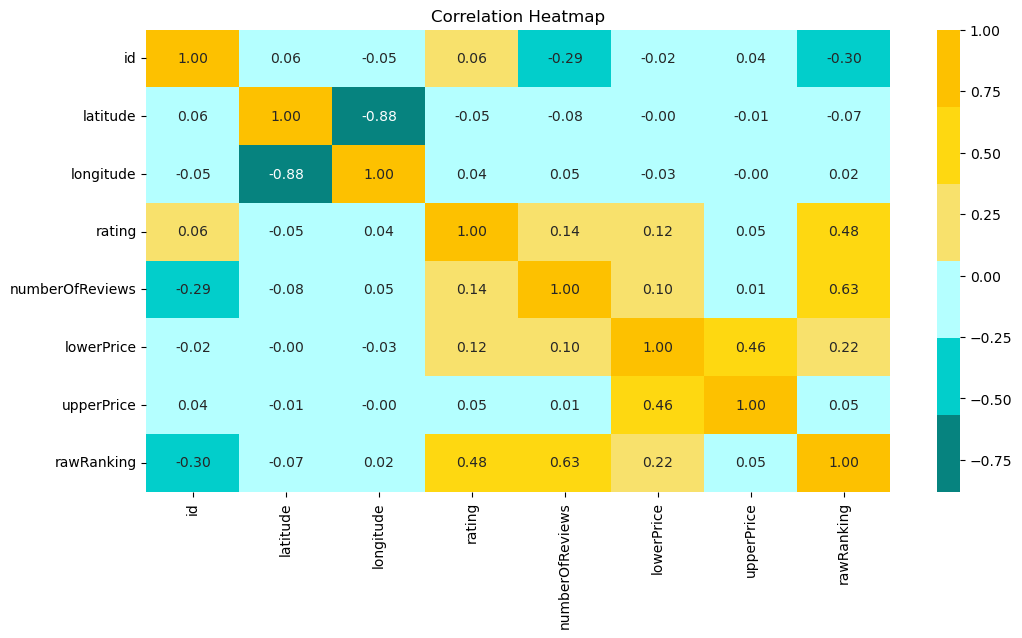

In [75]:
# Define your custom color palette
custom_palette = ['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100']

# Select numerical columns from your final_data DataFrame
numerical_columns = final_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set the size of the heatmap figure
plt.figure(figsize=(12, 6))

# Create the heatmap with annotations, using your custom color palette
# - `annot=True` adds the correlation values to the cells
# - `cmap=custom_palette` sets the custom color palette for the heatmap
# - `fmt=".2f"` formats the annotation values as floating-point numbers with 2 decimal places
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [76]:

X = data[['rawRanking', 'numberOfReviews']]

# Add a constant term for the intercept
X['const'] = 1

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

          Variable         VIF
0       rawRanking    1.496523
1  numberOfReviews    1.496523
2            const  145.419459


**Explanation** 
- The correlation values show low corelation between variables in the final data, though there exists a modelately strong correlation between 'rawRanking' and numberOfReviews. However, the variance inflation factor value of 1.5 between these variables implies that they have little to no multicolinearity. Thus, we can say that 'rawRanking' and 'numberOfReviews' are related, but one variable does not directly causes the other to change.


Correlation between having a website and ratings: 0.14095165000521442


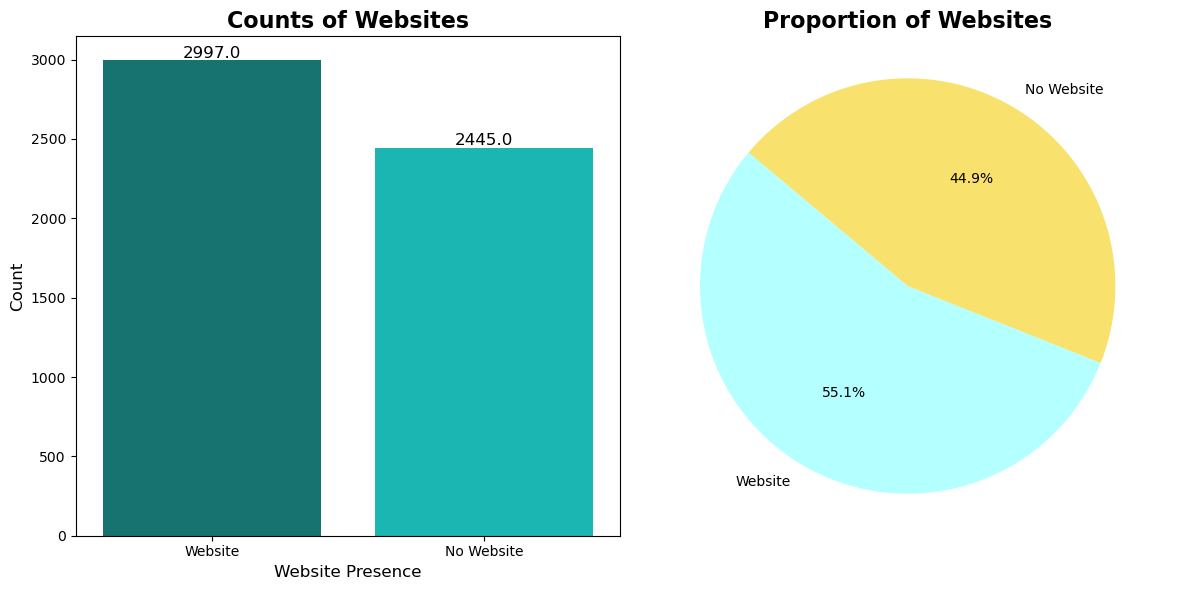

In [102]:
# Count the number of restaurants and hotels without websites
no_website_counts = final_data['website'].apply(lambda x: 'No Website' if 'No Website' in x else 'Website').value_counts()

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar plot for counts
ax1 = sns.barplot(x=no_website_counts.index, y=no_website_counts.values, palette=['#06837f', '#02cecb'], ax=axes[0])
ax1.set_title('Counts of Websites', fontsize=16, weight='bold')
ax1.set_xlabel('Website Presence', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Add annotations to the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                  va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Convert the 'website' column to a binary variable
final_data['has_website'] = final_data['website'].apply(lambda x: 0 if 'No Website' in x else 1)

# Calculate the correlation coefficient between 'has_website' and 'rating'
correlation = final_data['has_website'].corr(final_data['rating'])

# Display the correlation coefficient
print("\nCorrelation between having a website and ratings:", correlation)


# Create a pie chart for the proportion
ax2 = plt.subplot(1, 2, 2)
ax2.pie(no_website_counts, labels=no_website_counts.index, autopct='%1.1f%%', startangle=140, colors=['#b4ffff', '#f8e16c'])
ax2.set_title('Proportion of Websites', fontsize=16, weight='bold')
ax2.axis('equal')
print
# Display the plots
plt.tight_layout()
plt.show()


**Number of Restaurants and Hotels with Websites:**

According to the analysis, there are two categories of establishments in the dataset: those with websites and those without websites.
The count reveals that there are 2,997 restaurants and hotels with websites, while 2,445 restaurants and hotels do not have websites.
This information provides an overview of the online presence of restaurants and hotels in the dataset.

**Correlation between Having a Website and Ratings:**

The correlation coefficient between having a website and ratings is approximately 0.141.
This positive correlation coefficient suggests a weak positive relationship between having a website and higher ratings.
In other words, there is a tendency for restaurants and hotels with websites to have slightly higher ratings compared to those without websites. However, the correlation is relatively weak, indicating that other factors likely influence ratings as well.

**Interpretation Summary:**

The dataset contains more establishments with websites (2,997) than those without websites (2,445), indicating that a significant portion of the restaurants and hotels in the dataset maintain an online presence.
The positive correlation coefficient of 0.141 suggests a mild association between having a website and higher ratings. This means that, on average, restaurants and hotels with websites tend to receive slightly higher ratings, but the effect is not particularly strong.
It's important to note that while having a website may contribute to higher ratings, various other factors such as food quality, service, location, and customer experience likely play a more substantial role in determining overall ratings.
In summary, the analysis suggests that having a website may have a positive influence on ratings, but it is just one of many factors that can impact the success and reputation of a restaurant or hotel. Further analysis and consideration of additional variables may be needed to better understand the factors contributing to ratings in this dataset.

### <a id='toc7_1_4_'></a>[Regional Ratings Comparison for Restaurants:](#toc0_)

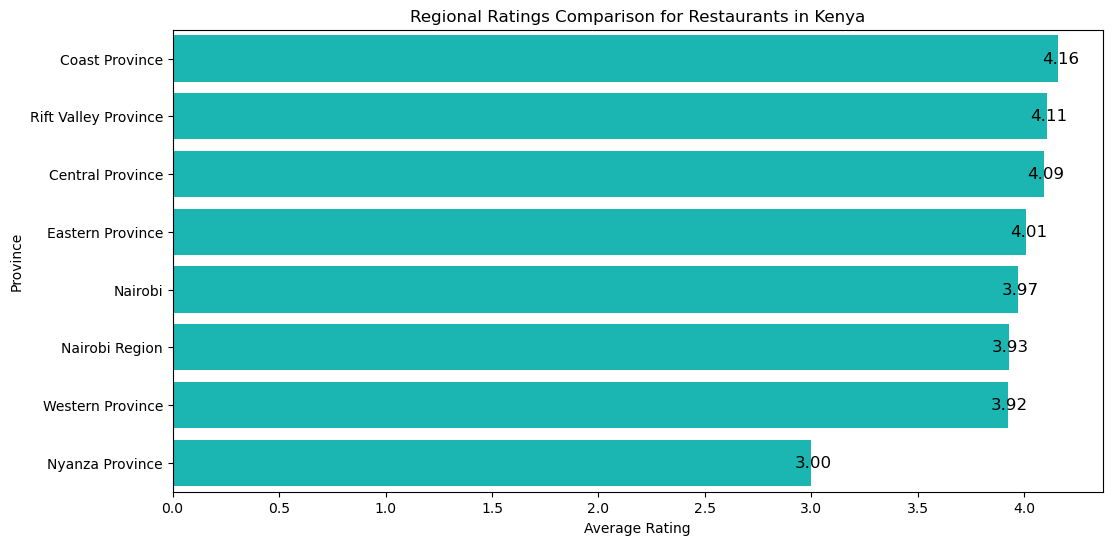

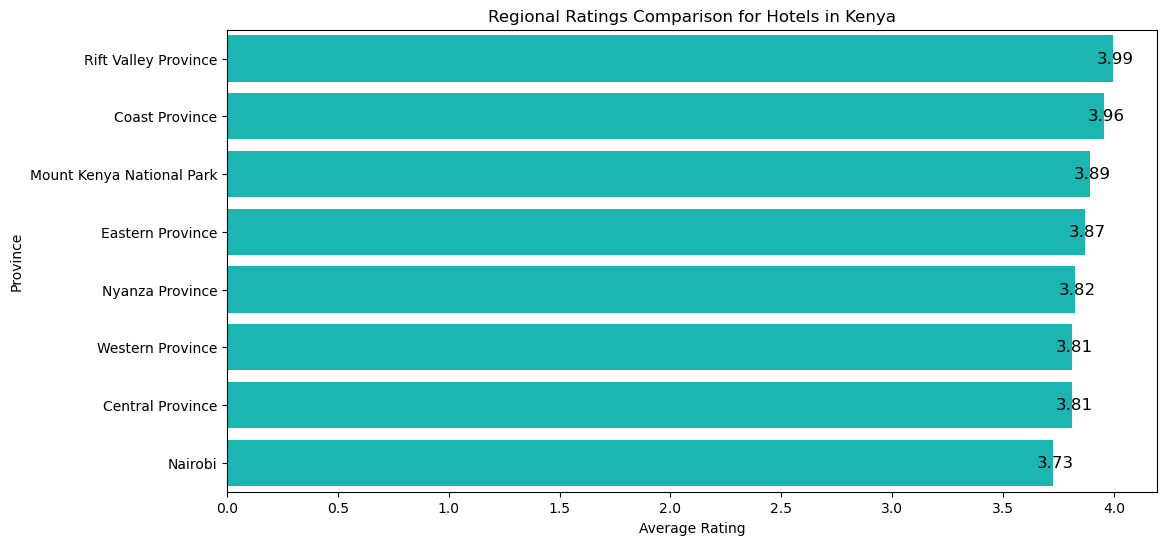

In [78]:
# Function to extract the province from locationString
def extract_province(location):
    parts = location.split(',')
    if len(parts) > 1:
        return parts[-1].strip()
    return location

# Apply the extract_province function to the 'locationString' column
final_data['province'] = final_data['locationString'].apply(extract_province)

# Regional Ratings Comparison for Restaurants
restaurant_ratings_by_province = final_data[final_data['category'] == 'restaurant'].groupby('province')['rating'].mean().sort_values(ascending=False)

# custom color
bar_color = '#02cecb'

# Plot the regional ratings comparison for restaurants with a single color and thinner bars
plt.figure(figsize=(12, 6))
sns.barplot(x=restaurant_ratings_by_province.values, y=restaurant_ratings_by_province.index, color=bar_color)
plt.xlabel('Average Rating')
plt.ylabel('Province')
plt.title('Regional Ratings Comparison for Restaurants in Kenya')

ax = plt.gca()
for patch in ax.patches:
    width = patch.get_width() 
    ax.annotate(f'{width:.2f}', (width + 0.01, patch.get_y() + patch.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')

plt.show()

# Regional Ratings Comparison for Hotels
hotel_ratings_by_province = final_data[final_data['category'] == 'hotel'].groupby('province')['rating'].mean().sort_values(ascending=False)

# Plot the regional ratings comparison for hotels with a single color and thinner bars
plt.figure(figsize=(12, 6))
sns.barplot(x=hotel_ratings_by_province.values, y=hotel_ratings_by_province.index, color=bar_color)
plt.xlabel('Average Rating')
plt.ylabel('Province')
plt.title('Regional Ratings Comparison for Hotels in Kenya')

# Adjust bar width (you can change the multiplier to make the bars thinner)
ax = plt.gca()
for patch in ax.patches:
    width = patch.get_width()
    ax.annotate(f'{width:.2f}', (width + 0.01, patch.get_y() + patch.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')

plt.show()

Restaurants:

- Coastal provinces, like Mombasa and Kwale, have the highest restaurant ratings, reflecting the popularity of coastal cuisine.
- Central Province offers diverse culinary experiences with above-average ratings.
- Nairobi remains a culinary hub with mixed restaurant ratings catering to various tastes.

Hotels:

- Coastal provinces, particularly Mombasa and Kwale, lead in hotel ratings, offering picturesque coastal views.
- Nairobi features a wide range of hotels with varying ratings to accommodate diverse traveler preferences.
- Central Province maintains competitive hotel ratings, ensuring a comfortable stay for travelers.

### <a id='toc7_1_5_'></a>[Distribution of Hotels and Restaurants Across Towns (Top 20)](#toc0_)

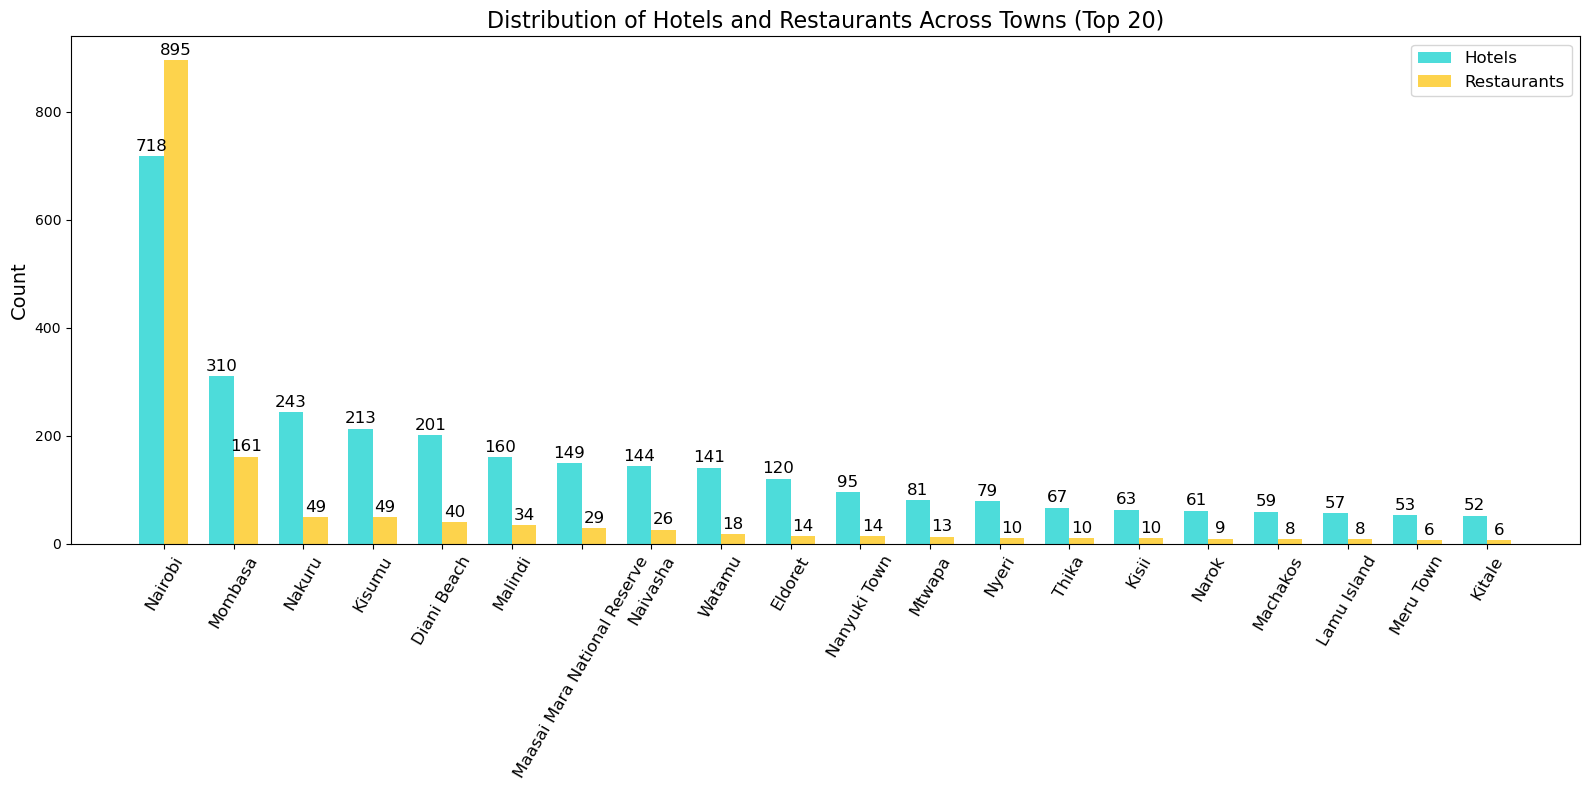

In [79]:
# Filter the data for hotels and restaurants
hotels = final_data[final_data['category'] == 'hotel']
restaurants = final_data[final_data['category'] == 'restaurant']

# Count the number of hotels and restaurants for each source
hotel_counts = hotels['town'].value_counts()
restaurant_counts = restaurants['town'].value_counts()

# Combine the unique towns from both hotels and restaurants
all_towns = set(hotel_counts.index) | set(restaurant_counts.index)

# Create arrays with zeros for sources that are missing in hotel or restaurant data
missing_hotel_towns = np.setdiff1d(list(all_towns), hotel_counts.index)
missing_restaurant_towns = np.setdiff1d(list(all_towns), restaurant_counts.index)

# Add missing sources with count 0
for town in missing_hotel_towns:
    hotel_counts[town] = 0

for town in missing_restaurant_towns:
    restaurant_counts[town] = 0

# Sort the counts by the unique towns and select the top 20 towns
top_20_hotel_counts = hotel_counts.loc[list(all_towns)].nlargest(20)
top_20_restaurant_counts = restaurant_counts.loc[list(all_towns)].nlargest(20)
# Create a figure and axis for the bar plots
fig, ax = plt.subplots(figsize=(16, 8))

# Define the width of the bars
width = 0.35

# Create an array of x values for the bars
x = np.arange(len(top_20_hotel_counts))

# Create the bar plots for hotels and restaurants
ax.bar(x - width/2, top_20_hotel_counts, width, label='Hotels', color='#02cecb', alpha=0.7)
ax.bar(x + width/2, top_20_restaurant_counts, width, label='Restaurants', color='#fdc100', alpha=0.7)

# Annotate the bars with exact counts
for i, count in enumerate(top_20_hotel_counts):
    ax.text(x[i] - width/2, count + 10, str(count), ha='center', fontsize=12)

for i, count in enumerate(top_20_restaurant_counts):
    ax.text(x[i] + width/2, count + 10, str(count), ha='center', fontsize=12)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(top_20_hotel_counts.index, rotation=60, fontsize=12)

# Set the y-axis label
ax.set_ylabel('Count', fontsize=14)

# Set the title and legend
ax.set_title('Distribution of Hotels and Restaurants Across Towns (Top 20)', fontsize=16)
ax.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Towns:** The x-axis represents the names of the top 20 towns or locations in Kenya, such as Nairobi, Mombasa, Nakuru, Kisumu, and Diani Beach.

**Count:** The y-axis represents the count of both hotels and restaurants in each town. It shows how many hotels and restaurants are present in each of these locations.

**Purple Bars (Hotels):** Purple bars represent the number of hotels in each town. Hotels are typically shown on the left side of each town's label.

**Green Bars (Restaurants):** Green bars represent the number of restaurants in each town. Restaurants are typically shown on the right side of each town's label.

**`Patterns:`**

The pattern is consistent across all the towns, with hotels consistently having double the frequency compared to restaurants in each location.
Nairobi has the highest number of both hotels and restaurants, followed by Mombasa, Nakuru, Kisumu, and Diani Beach.
Insights:

The plot provides insights into the distribution of accommodation (hotels) and dining options (restaurants) across various towns in Kenya.
It highlights the dominance of hotels over restaurants in terms of frequency, suggesting that Kenya's hospitality sector may be more hotel-centric.
Nairobi, as the capital and largest city, has the most extensive presence of both hotels and restaurants, likely due to its economic and tourism significance.
Overall, this plot helps visualize the geographical distribution of hotels and restaurants, emphasizing the variation in the number of establishments across different towns in Kenya.

### <a id='toc7_1_6_'></a>[Distribution of Ratings for Hotels and Restaurants](#toc0_)

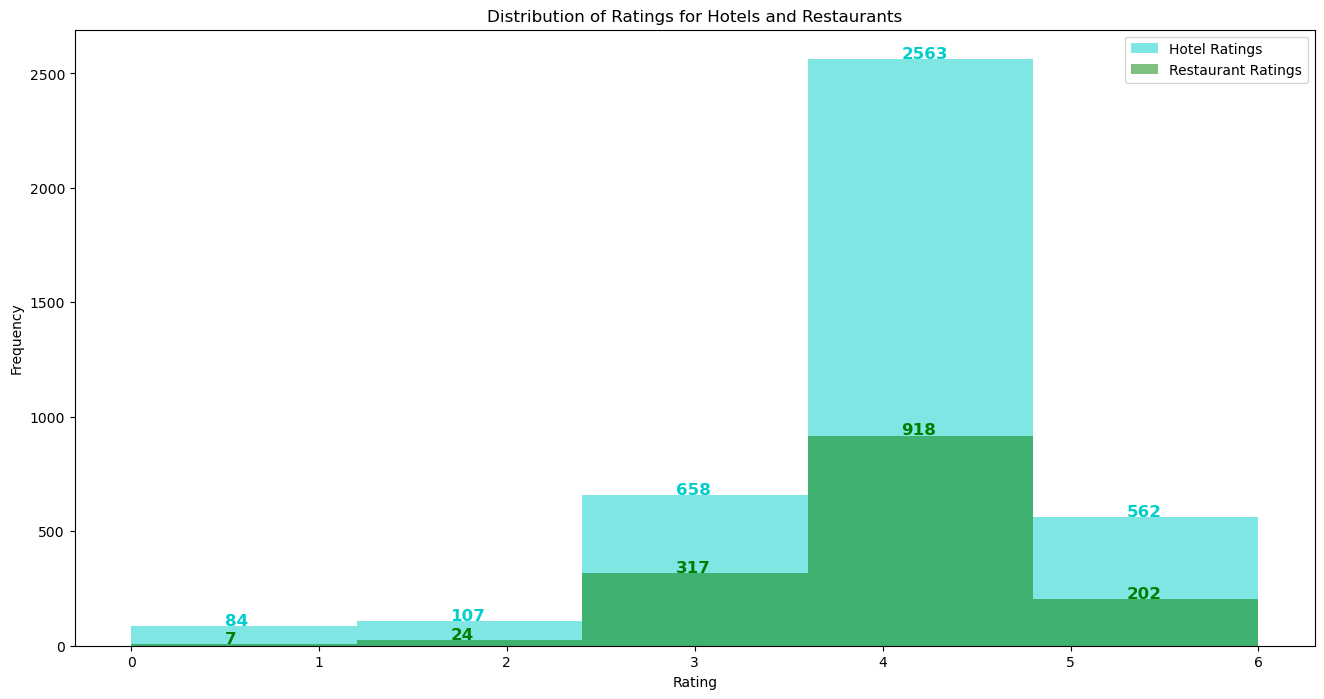

In [80]:

# Filter the final_data DataFrame for 'hotel' and 'restaurant' categories
hotel_ratings = final_data[final_data['category'] == 'hotel']['rating']
restaurant_ratings = final_data[final_data['category'] == 'restaurant']['rating']

# Create separate histograms for hotel and restaurant ratings
plt.figure(figsize=(16, 8))

# Plot the histogram for hotel ratings in blue
hotel_hist, bins, _ = plt.hist(hotel_ratings, bins=5, alpha=0.5, label='Hotel Ratings', color='#02cecb', range=(0, 6))

# Plot the histogram for restaurant ratings in yellow
restaurant_hist, _, _ = plt.hist(restaurant_ratings, bins=bins, alpha=0.5, label='Restaurant Ratings', color='green')

# Set labels, title, and legend
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Hotels and Restaurants')
plt.legend()

# Add annotations for hotel ratings
for i, freq in enumerate(hotel_hist):
    plt.text(bins[i] + 0.5, freq + 5, str(int(freq)), fontsize=12, color='#02cecb', fontweight='bold')

# Add annotations for restaurant ratings
for i, freq in enumerate(restaurant_hist):
    plt.text(bins[i] + 0.5, freq + 5, str(int(freq)), fontsize=12, color='green', fontweight='bold')

# Display the histograms with annotations
plt.show()

Overall, the plots show that both hotels and restaurants tend to receive higher ratings, with the most frequent ratings clustered around 4.5. Additionally, the hotel ratings appear to be consistently more frequent than restaurant ratings across all rating values, often more than double.

The similarity in the distribution patterns suggests that both hotels and restaurants share a common trend in their ratings, with customers generally favoring ratings in the 4.5 range.

### <a id='toc7_1_7_'></a>[Comparison of Word Clouds for Hotels and Restaurants by Rating:](#toc0_)

How do the most frequently mentioned features in reviews for hotels and restaurants differ across various rating levels?

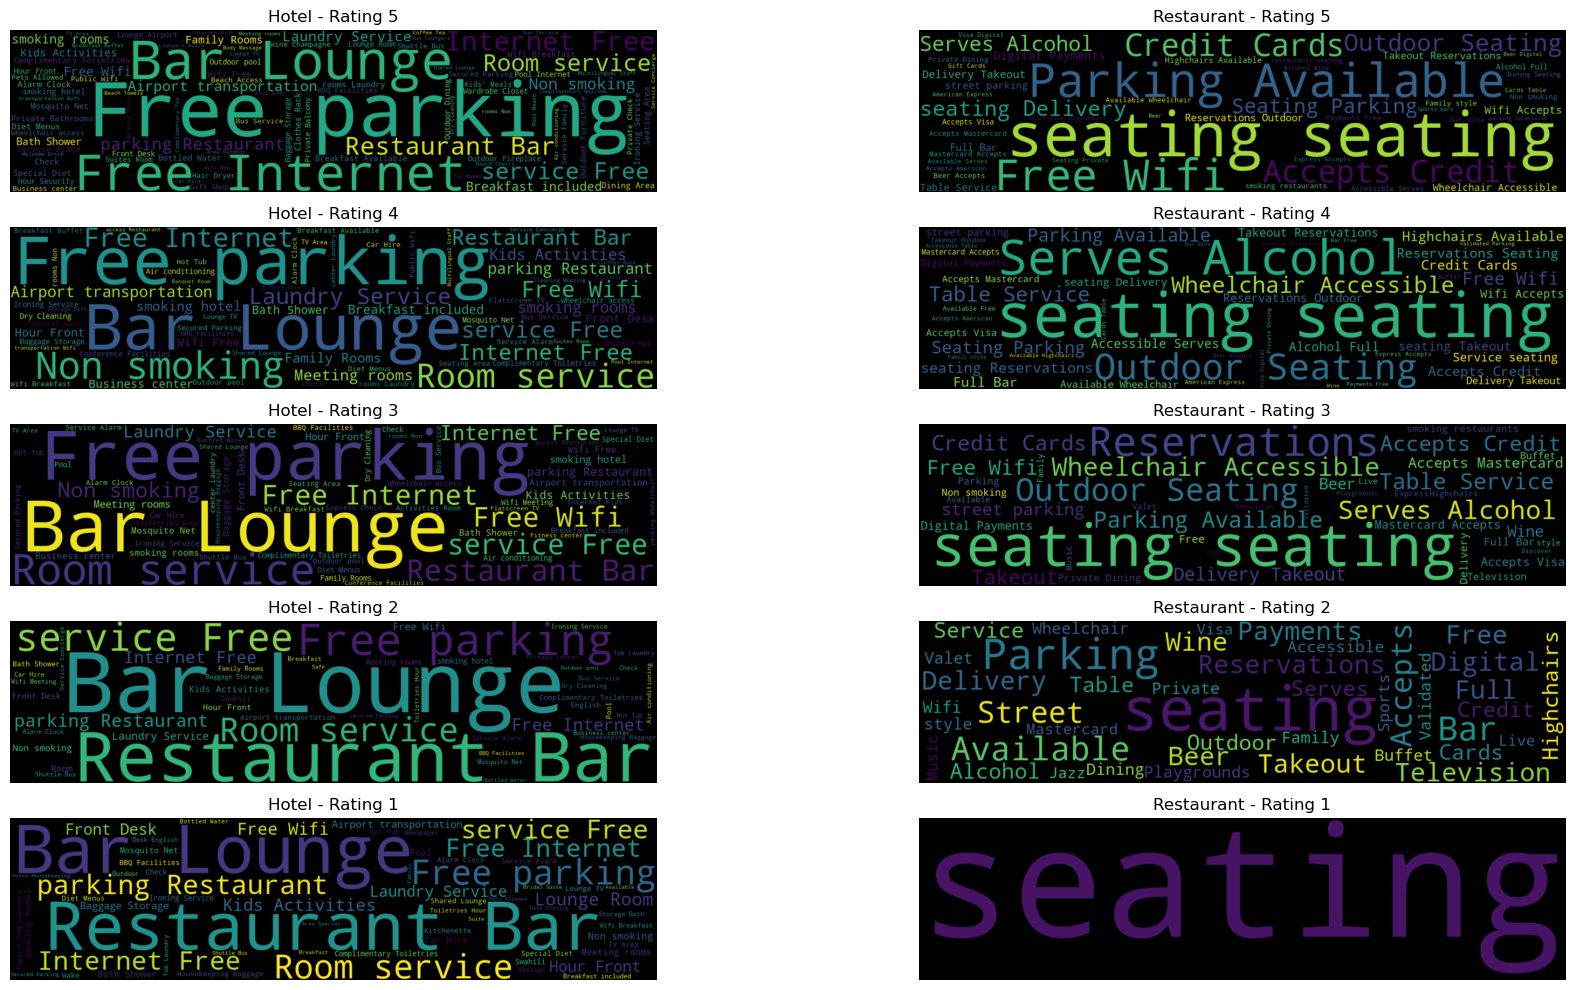

In [81]:
# Function to generate word clouds
def generate_word_cloud(final_data, category, rating):
    # Filter the DataFrame by category and rating
    filtered_data = final_data[(final_data['category'] == category) & (final_data['rating'] == rating)]
    
    # Join the features in the filtered data
    text_data = " ".join(filtered_data['features'])
    
    # Generate a word cloud with dark background
    wordcloud = WordCloud(width=1200, height=300, background_color='black', colormap='viridis',
                          min_font_size=10).generate(text_data)
    
    return wordcloud

# Categories and ratings
categories = ['hotel', 'restaurant']
ratings = [5, 4, 3, 2, 1]

# Create subplots with two columns for "hotel" and "restaurant"
fig, axs = plt.subplots(nrows=len(ratings), ncols=len(categories), figsize=(20, 10))

# Generate and plot word clouds for each category and rating
for i, category in enumerate(categories):
    for j, rating in enumerate(ratings):
        wordcloud = generate_word_cloud(final_data, category, rating)
        axs[j, i].imshow(wordcloud, interpolation='bilinear')
        axs[j, i].set_title(f'{category.capitalize()} - Rating {rating}')
        axs[j, i].axis('off')

# Adjust spacing between subplots
plt.tight_layout(w_pad=1.5)
plt.show()

- Each word cloud represents the most common words or features associated with hotels or restaurants at a specific rating level.

- Words that appear larger in the word cloud are more common in the corresponding category and rating.

- This visualization allows us to explore the key features that customers often mention in their reviews or descriptions, providing insights into what makes a hotel or restaurant highly rated or less favored by customers.

### <a id='toc7_1_8_'></a>[Visualizing Distribution of Cuisine](#toc0_)

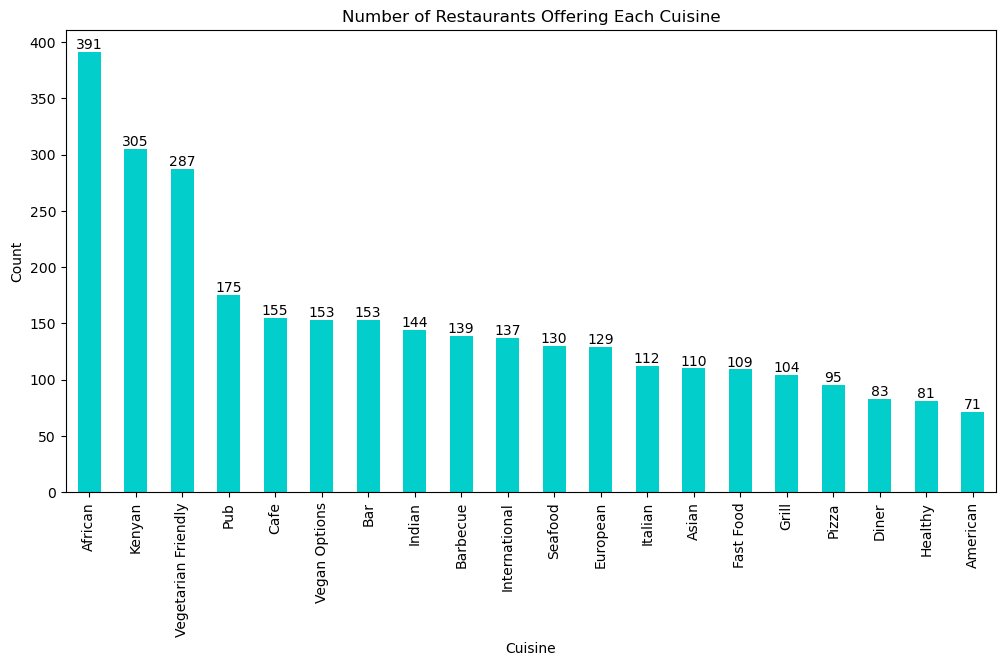

In [82]:
# Function to standardize cuisine
def standardize_cuisine(cuisine_str):
    if isinstance(cuisine_str, str):
        return cuisine_str.split(', ')
    else:
        return cuisine_str

# Apply the standardize_cuisine function
data['cuisine'] = data['cuisine'].apply(standardize_cuisine)

# Explode the DataFrame to split cuisine values into separate rows
data['cuisine'] = data['cuisine'].apply(lambda x: [x] if isinstance(x, str) else x)
df = data.explode('cuisine')

# Count the occurrences of each cuisine and select the top 20
cuisine_counts = df['cuisine'].value_counts().head(20)

# Create a bar graph with the specified color
plt.figure(figsize=(12, 6))
ax = cuisine_counts.plot(kind='bar', color='#02cecb')  # Use the color you specified

# Set plot title, labels, and rotate x-axis labels for better readability
plt.title('Number of Restaurants Offering Each Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()


The bar graph shows that there is a wide variety of cuisines available in the Kenya. However,African, Kenyan,vegan, and pub cuisines are the most popular.



### <a id='toc7_1_9_'></a>[Distribution of Hotel and Restaurant Prices](#toc0_)

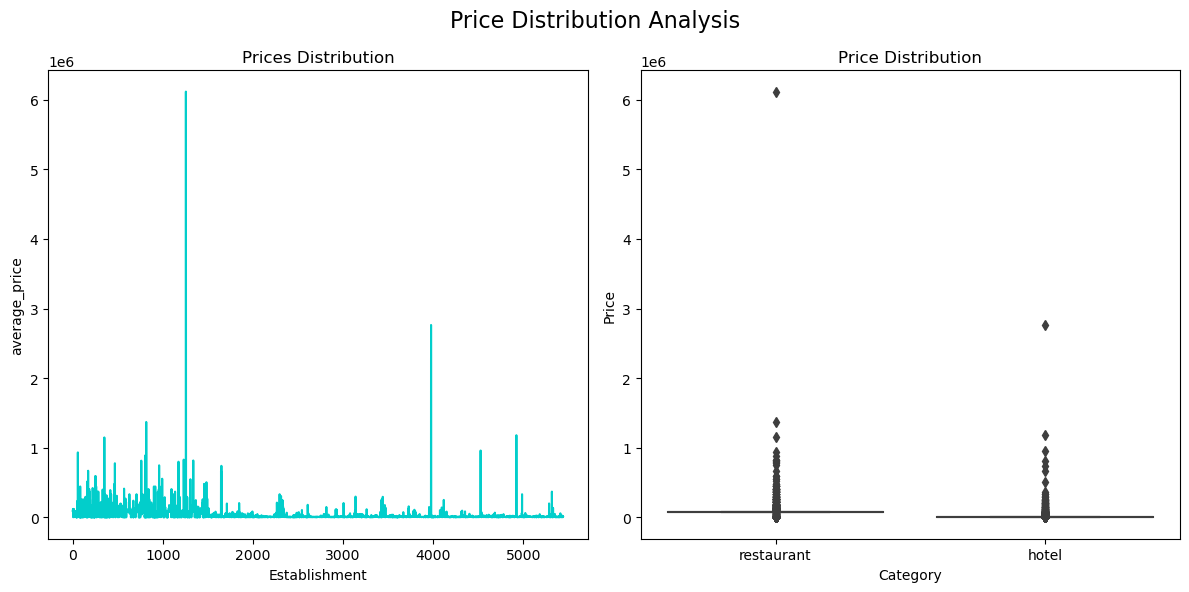

In [83]:

# Calculate the average price
final_data['average_price'] = (final_data['upperPrice'] + final_data['lowerPrice']) / 2

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Line plot for price distribution
sns.lineplot(data=final_data['average_price'], ax=axes[0], color='#02cecb')  # Use the color you specified
axes[0].set_xlabel('Establishment')
axes[0].set_title('Prices Distribution')

# Box plot for price distribution by category
sns.boxplot(x=final_data['category'], y=final_data['average_price'], ax=axes[1], palette=['#02cecb', '#fdc100'])  # Use colors
axes[1].set_title('Price Distribution')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Price')

# Add a super title
plt.suptitle('Price Distribution Analysis', fontsize=16)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

- The first diagram shows hotels in the x-axis and their average price. 
- The prices flactuate greatly and there exists some outliers, the two main ones being 6 million for restaurant and 3 million for hotels.

### <a id='toc7_1_10_'></a>[Check for Price Correlation](#toc0_)

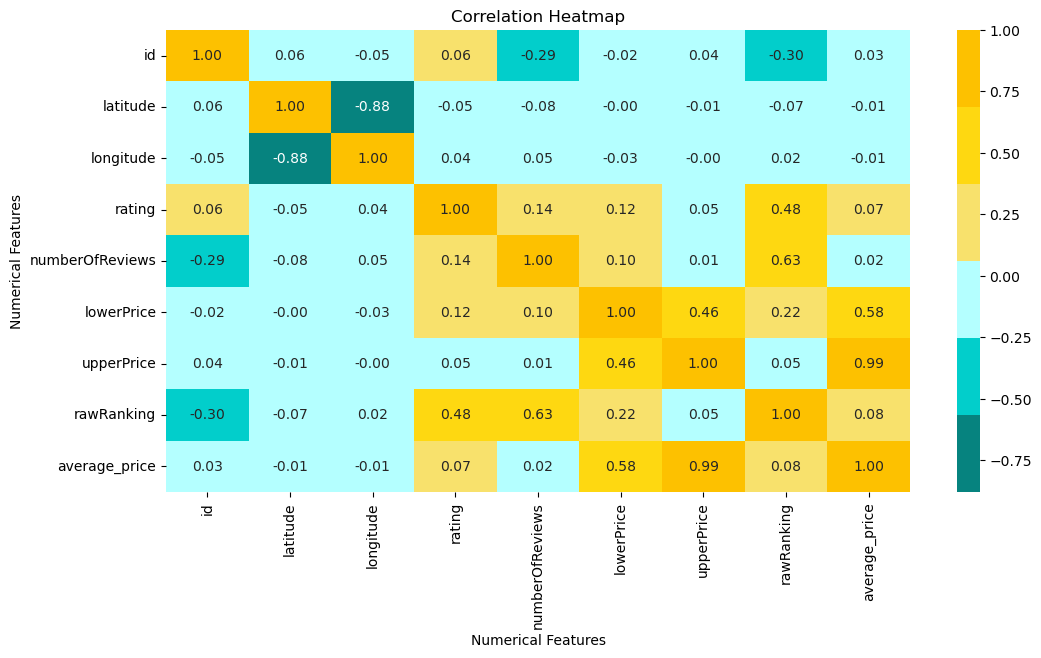

In [84]:
# Define your custom color palette
custom_palette = ['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100']

# Select numerical columns
numerical_columns = final_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap using your custom color palette
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f")
plt.title("Correlation Heatmap")
plt.xlabel("Numerical Features")
plt.ylabel("Numerical Features")

# Display the heatmap
plt.show()

In [85]:
final_data['average_price'].describe()

count    5.442000e+03
mean     3.850535e+04
std      1.160056e+05
min      2.220000e+02
25%      8.523500e+03
50%      8.523500e+03
75%      6.272212e+04
max      6.114734e+06
Name: average_price, dtype: float64

- There seems to be no correlation between prices and other features. The correlation coefficient does not go above 0.09 which indicates a very weak correlation.
- There is a big difference between the lowest price, which is 220, and the highest, which is 6 million.

### <a id='toc7_1_11_'></a>[Regional Price Comparison](#toc0_)

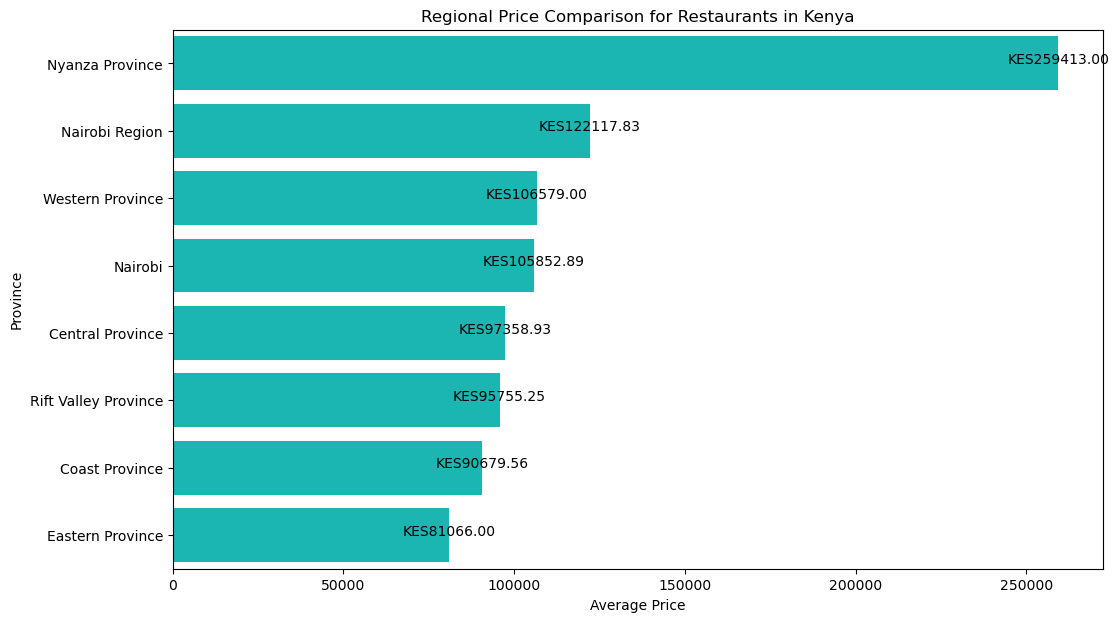

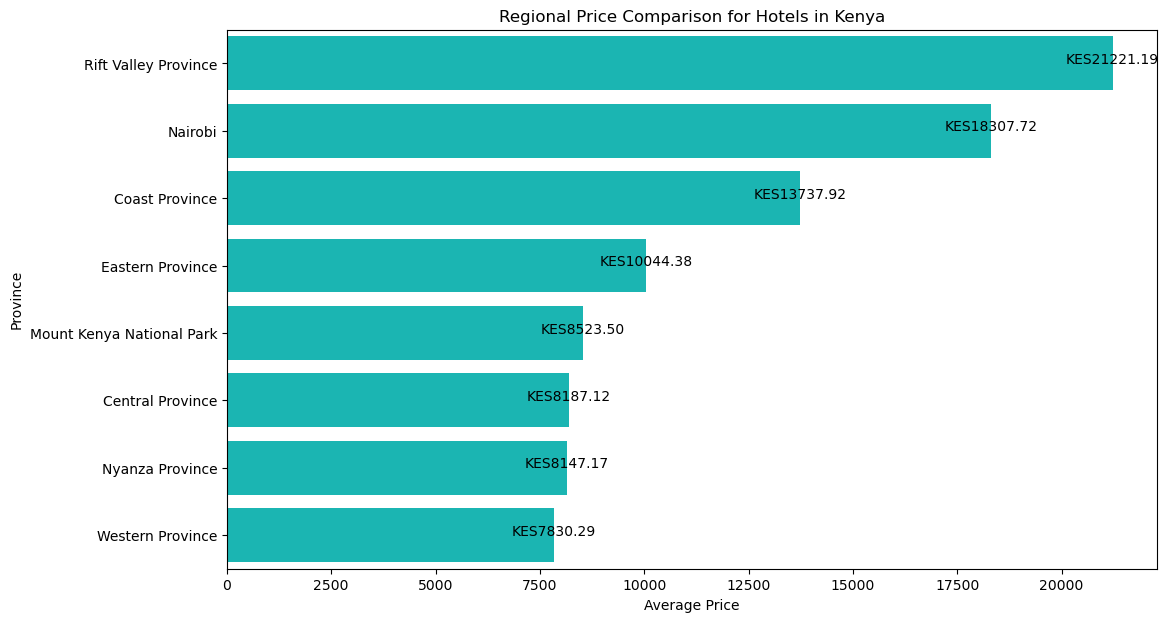

In [86]:
# Regional Price Comparison for Restaurants
restaurant_ratings_by_province = final_data[final_data['category'] == 'restaurant'].groupby('province')['average_price'].mean().sort_values(ascending=False)

# Set the color you want to use
bar_color = '#02cecb'

# Plot the regional price comparison for restaurants
plt.figure(figsize=(12, 7))
ax1 = sns.barplot(x=restaurant_ratings_by_province.values, y=restaurant_ratings_by_province.index, color=bar_color)
plt.xlabel('Average Price')
plt.ylabel('Province')
plt.title('Regional Price Comparison for Restaurants in Kenya')

# Add average price labels to the top of each bar
for p in ax1.patches:
    ax1.annotate(f'KES{p.get_width():.2f}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='center')

plt.show()

# Regional Price Comparison for Hotels
hotel_ratings_by_province = final_data[final_data['category'] == 'hotel'].groupby('province')['average_price'].mean().sort_values(ascending=False)

# Plot the regional price comparison for hotels
plt.figure(figsize=(12, 7))
ax2 = sns.barplot(x=hotel_ratings_by_province.values, y=hotel_ratings_by_province.index, color=bar_color)
plt.xlabel('Average Price')
plt.ylabel('Province')
plt.title('Regional Price Comparison for Hotels in Kenya')

# Add average price labels to the top of each bar
for p in ax2.patches:
    ax2.annotate(f'KES{p.get_width():.2f}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='center')

plt.show()

- The most expensive restaurant in Kenya from the dataset is in Nyanza province. It is an outlier therefore it may be an error in pricing data. 
- For hotels the most expensive is region is Rift Valley Province. Although it is significantly higher than the average it does not appear to be an erroneous input.

### <a id='toc7_1_12_'></a>[Visualizing Top Towns by Province](#toc0_)

The set of bar charts shows, one for each province in your dataset. Each bar chart displays the top five towns  within that province based on the number of occurrences. The height of the bars represents the count of occurrences for each town. This visualization helps you understand which towns are the most prominent for each province in terms of interactions or data points. It provides insights into the distribution of retaurants and hotels in towns across different regions or provinces in our dataset.

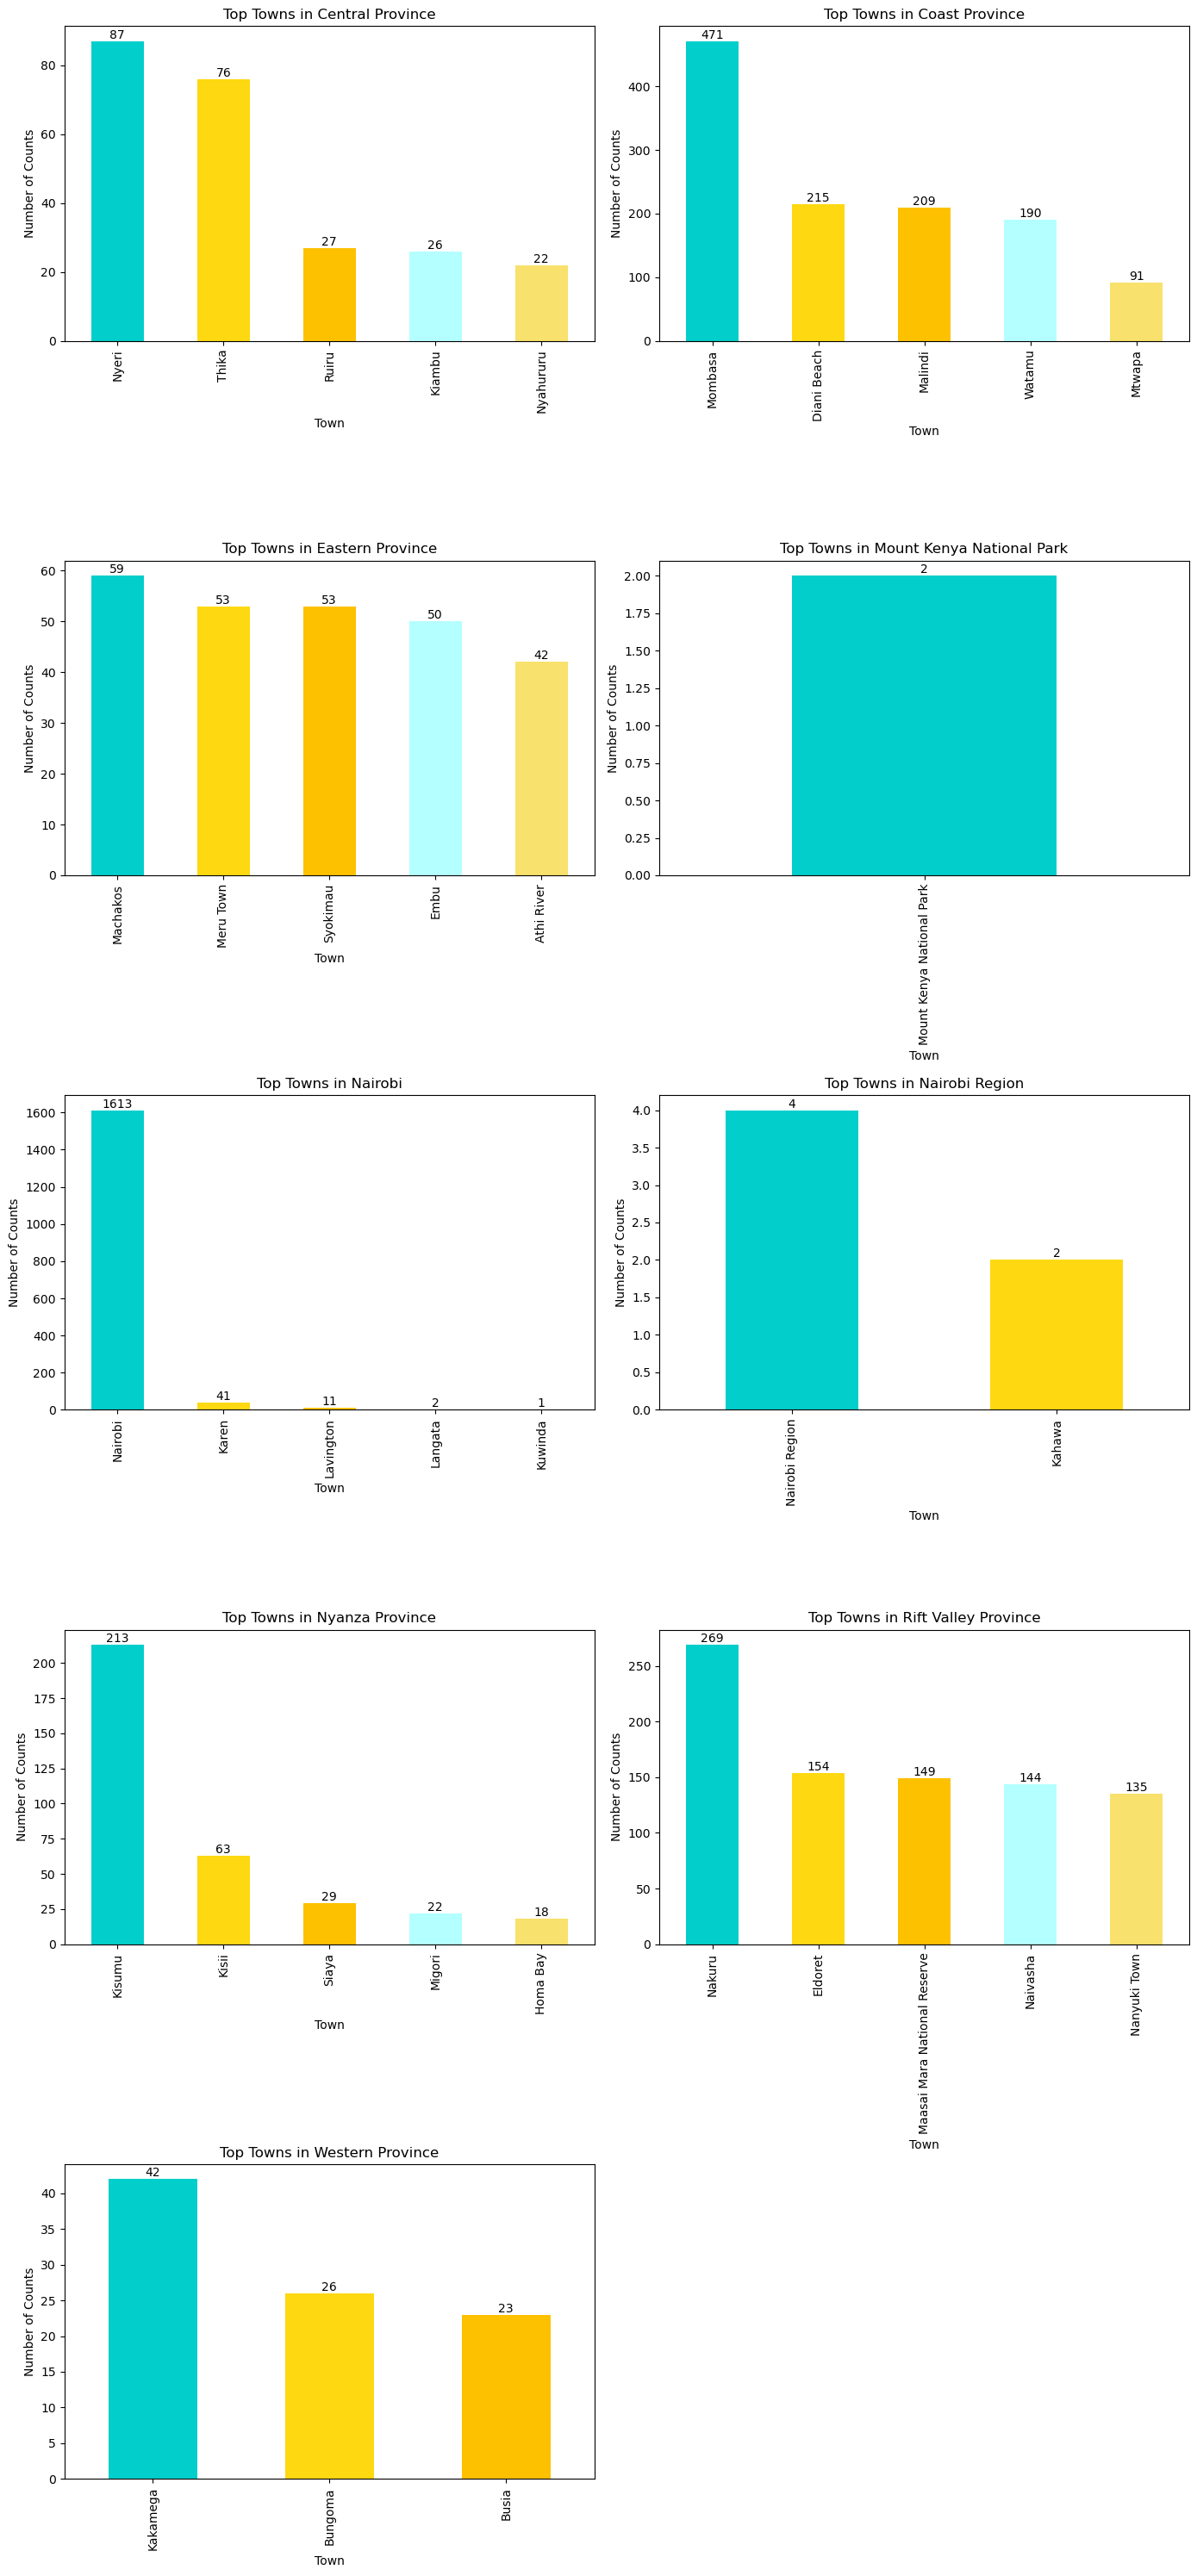

In [87]:
# Group the data by 'province' and 'source', and count the occurrences
province_source_counts = final_data.groupby(['province', 'town']).size().unstack().fillna(0)

# Calculate the top five sources for each province
top_sources_per_province = {}
for province in province_source_counts.index:
    top_sources = province_source_counts.loc[province].sort_values(ascending=False).head(5)
    top_sources_per_province[province] = top_sources

# Calculate the number of rows and columns needed for the plots
num_plots = len(top_sources_per_province)
num_rows = (num_plots + 1) // 2  # Two plots per row
num_cols = 2
# Define a color palette
custom_palette = ['#02cecb', '#fed811', '#fdc100', '#b4ffff', '#f8e16c']

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 6 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create a separate plot for each province
for i, (province, top_sources) in enumerate(top_sources_per_province.items()):
    ax = axes[i]
    
    # Filter sources with counts greater than zero
    top_sources = top_sources[top_sources > 0]
    
    if not top_sources.empty:
        top_sources.plot(kind='bar', color=custom_palette, ax=ax)
        
        # Add counts on top of the bars
        for j, count in enumerate(top_sources):
            ax.text(j, count, str(int(count)), ha='center', va='bottom', fontsize=10)

        # Add labels and title
        ax.set_xlabel('Town')
        ax.set_ylabel('Number of Counts')
        ax.set_title(f'Top Towns in {province}')

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Ensure proper spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# <a id='toc8_'></a>[MODELLING](#toc0_)

### <a id='toc8_1_1_'></a>[Recommender system based only on Towns and ratings about the hotel](#toc0_)

In [88]:
def townbased(town):
    final_data['town'] = final_data['town'].str.lower()
    townbase = final_data[final_data['town'] == town.lower()]
    
    if not townbase.empty:
        # Sort the DataFrame by 'rating' and 'average_price' in descending order
        townbase = townbase.sort_values(by=['rating', 'average_price'], ascending=[False, True])
        
        # Select the columns you want to display
        hname = townbase[['name', 'rating', 'town', 'features', 'average_price']]
        
        return hname.head()
    else:
        print('No Hotels Available')

In [89]:
print('Top 5 hotels')
townbased('Nakuru')

Top 5 hotels


,name,rating,town,features,average_price
2055,Sleepway Cottages,5.0,nakuru,"Internet, Suites, Room service, Free Internet,...",1704.5
1647,Kentania Hotels,5.0,nakuru,"Internet, Room service, Free Internet, Free pa...",3854.0
1616,Hotel Marvin,5.0,nakuru,"Kids Activities, Room service, Free parking, R...",4002.5
1635,Brooks Lodge & Spa,5.0,nakuru,"Room service, Free Internet, Free parking, Res...",4521.0
1638,Vienna Woods Holiday Inn Hotel,5.0,nakuru,"Room service, Free Internet, Free parking, Res...",5929.5


### <a id='toc8_1_2_'></a>[Requirement And special needs based Recommender](#toc0_)

In [90]:

def requirementbased(town, numberOfReviews, features):
    final_data['town'] = final_data['town'].str.lower()
    final_data['features'] = final_data['features'].str.lower()
    features = features.lower()
    features_tokens = word_tokenize(features)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_tokens if not w in sw}
    f_set = set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    reqbased = final_data[final_data['town'] == town.lower()]
    
    reqbased = reqbased.set_index(np.arange(reqbased.shape[0]))
    l1 = []; l2 = []; cos = []
    
    for i in range(reqbased.shape[0]):
        temp_tokens = word_tokenize(reqbased['features'][i])
        temp1_set = {w for w in temp_tokens if not w in sw}
        temp_set = set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        cos.append(len(rvector))
    
    reqbased['similarity'] = cos
    reqbased = reqbased.sort_values(by='similarity', ascending=False)
    reqbased.drop_duplicates(subset='id', keep='first', inplace=True)
    
    return reqbased[['name', 'rating', 'town', 'features' , 'similarity','average_price']].head(10)

In [91]:
requirementbased('Nairobi',66,'Swim')

,name,rating,town,features,similarity,average_price
0,Imperial Lounge,2.5,nairobi,seating,0,88941.5
1072,Central Park Hotel Nairobi,3.5,nairobi,"restaurant, internet, suites, breakfast includ...",0,7856.5
1082,Zarita Boutique Hotel,4.0,nairobi,"restaurant, bar/lounge",0,3335.5
1081,Natural Oak Apartments,4.0,nairobi,"internet, kitchenette, free wifi, pool, shuttl...",0,6893.0
1080,La Maison Royale South C,4.0,nairobi,"room service, free internet, free parking, res...",0,9190.5
1079,Glory Palace Hotel,4.5,nairobi,"internet, kids activities, suites, room servic...",0,4817.5
1078,Marble Arch Hotel,3.5,nairobi,"free internet, free wifi, suites, public wifi,...",0,5707.0
1077,Hob House,5.0,nairobi,"internet, room service, free parking, restaura...",0,16306.0
1076,Juddy Place,5.0,nairobi,"free parking, free wifi, laundry service, hous...",0,2594.5
1075,Giraffe Manor,5.0,nairobi,"internet, shuttle bus service, suites, free in...",0,86718.0


In [92]:


def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0  # Earth's Radius
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

def hybrid( town, numberOfReviews, features, data):
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()

    # Tokenize and preprocess the features
    features = features.lower()
    features_tokens = word_tokenize(features)
    f1_set = {w for w in features_tokens if not w in sw}
    f_set = set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))

    # Replace this part with your own data retrieval method
    # For example, you might have a DataFrame called 'locations' with 'address', 'city', 'latitude', and 'longitude' columns
    location_data = final_data[final_data['town'] == town.lower()]

    dist = []
    lat1, long1 = 0.0, 0.0  # Replace with your method to obtain lat1 and long1
    lat1, long1 = radians(lat1), radians(long1)

    for i in range(location_data.shape[0]):
        lat2, long2 = radians(location_data['latitude'].iloc[i]), radians(location_data['longitude'].iloc[i])
        distance = calculate_distance(lat1, long1, lat2, long2)
        dist.append(distance)

    location_data['distance'] = dist
    location_data = location_data.sort_values(by='distance', ascending=True).head(15)
    location_data = location_data.reset_index(drop=True)

    coss = []
    for i in range(location_data.shape[0]):
        temp_tokens = word_tokenize(location_data['features'].iloc[i])
        temp1_set = {w for w in temp_tokens if not w in sw}
        temp_set = set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        coss.append(len(rvector))

    location_data['similarity'] = coss
    return location_data.sort_values(by='similarity', ascending=False).head(10)

In [93]:

# Call the 'hybrid' function with your specified arguments
result = hybrid(town='Nairobi', numberOfReviews=78, features='pool', data=final_data)

# Print the first 5 rows with specific columns
result[['name', 'town', 'features', 'locationString', 'average_price']].head(5)

,name,town,features,locationString,average_price
11,InterContinental Nairobi,nairobi,"pool, room service, restaurant, business cente...",Nairobi,19122.5
13,Sportsview Hotel Kasarani,nairobi,"room service, wheelchair access, restaurant, b...",Nairobi,8005.0
14,Mercure Hotel Nairobi Upper Hill,nairobi,"pool, internet, room service, free internet, f...",Nairobi,24607.0
0,Imperial Lounge,nairobi,seating,Nairobi,88941.5
1,La Maison Royale South C,nairobi,"room service, free internet, free parking, res...",Nairobi,9190.5


In [94]:


# Create a TF-IDF vectorizer for the 'features' column
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(final_data['features'])

# Create a NearestNeighbors model
n_neighbors = 10  # Number of similar hotels to recommend
knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
knn_model.fit(tfidf_matrix)

# Function to get hotel recommendations
def recommend_hotels(input_features, n_recommendations=5):
    # Transform input_features into a TF-IDF vector
    input_vector = tfidf_vectorizer.transform([input_features])

    # Find the most similar hotels
    _, indices = knn_model.kneighbors(input_vector, n_neighbors=n_recommendations)
    
    # Return the recommended hotels
    return final_data.iloc[indices[0]][['name', 'town', 'features', 'locationString', 'average_price']]

# Example usage
input_features = 'pool'  # Input your desired features here
recommendations = recommend_hotels(input_features, n_recommendations=5)
recommendations

,name,town,features,locationString,average_price
5038,YMCA Nairobi (Central Branch),nairobi,pool,Nairobi,8523.5
3365,Rock Side Camp,voi,"pool, restaurant, free parking","Voi, Coast Province",8523.5
5054,Ngong View Apartment Bed and Breakfast,nairobi,"pool, room service, free parking",Nairobi,8523.5
1692,Sweet Lake Resort,naivasha,"restaurant, pool, internet, free parking, bar/...","Naivasha, Rift Valley Province",8968.5
3356,Galdessa Camp,tsavo national park east,"pool, internet, free wifi","Tsavo National Park East, Coast Province",8523.5


In [95]:


# Combine relevant features into a single column for TF-IDF vectorization
final_data['combined_features'] = final_data['features'] + ' ' + final_data['cuisine'] + ' ' + final_data['town'] + ' ' + final_data['name'] + ' ' + final_data['category']

# Create a TF-IDF vectorizer for the 'combined_features' column
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(final_data['combined_features'])

# Create a NearestNeighbors model
n_neighbors = 10  # Number of similar hotels to recommend
knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
knn_model.fit(tfidf_matrix)

# Function to get hotel recommendations
def recommend_hotels_restaurants(input_features, n_recommendations=5):
    # Transform input_features into a TF-IDF vector
    input_vector = tfidf_vectorizer.transform([input_features])

    # Find the most similar hotels
    _, indices = knn_model.kneighbors(input_vector, n_neighbors=n_recommendations)
    
    # Return the recommended hotels with relevant information
    recommended_hotels = final_data.iloc[indices[0]][['name', 'town','category', 'combined_features', 'locationString', 'average_price']]
    
    return recommended_hotels

# Example usage
input_features = '  fogo restaurant '  # Input your desired features, cuisine, and location here
recommendations = recommend_hotels_restaurants(input_features, n_recommendations=5)
recommendations

,name,town,category,combined_features,locationString,average_price
201,Fogo Gaucho,nairobi,restaurant,"takeout, reservations, outdoor seating, buffet...",Nairobi,3706.0
177,Fogo Gaucho,nairobi,restaurant,"takeout, buffet, seating, parking available, s...",Nairobi,33353.0
4654,Maasai Bar & Restaurant,mombasa,hotel,"room service, free internet, free parking, res...","Mombasa, Coast Province",6448.0
971,Flamingo Restaurant,mombasa,restaurant,seating African mombasa Flamingo Restaurant re...,"Mombasa, Coast Province",81555.5
1352,Masai Lodge Restaurant,nairobi,restaurant,seating Kenyan nairobi Masai Lodge Restaurant ...,Nairobi,81555.5


In [96]:


# Split your data into a training set and a test set
train_data, test_data = train_test_split(final_data, test_size=0.2, random_state=42)

# Function to calculate Average Precision (AP) for a single user
def average_precision(actual_items, recommended_items):
    # Initialize variables
    precision_at_k = 0
    relevant_count = 0
    
    # Calculate precision at each position and sum them up
    for i, item in enumerate(recommended_items):
        if item in actual_items:
            relevant_count += 1
            precision_at_k += relevant_count / (i + 1)
    
    if relevant_count == 0:
        return 0
    else:
        return precision_at_k / relevant_count

# Function to calculate Mean Average Precision (MAP) for the entire test set
def mean_average_precision(test_data, n_recommendations=5):
    map_sum = 0
    
    for _, row in test_data.iterrows():
        user_input = row['combined_features']
        actual_items = [row['name']]  # Actual relevant item
        
        # Get recommendations
        recommendations = recommend_hotels_restaurants(user_input, n_recommendations=n_recommendations)
        recommended_items = recommendations['name'].tolist()
        
        # Calculate AP for this user and add it to the sum
        map_sum += average_precision(actual_items, recommended_items)
    
    # Calculate MAP as the average of AP across all users
    map_score = map_sum / len(test_data)
    
    return map_score

# Example usage for evaluation
n_recommendations = 50 # Number of recommendations to generate
map_score = mean_average_precision(test_data, n_recommendations=n_recommendations)
print(f"Mean Average Precision (MAP) at {n_recommendations}: {map_score}")

Mean Average Precision (MAP) at 50: 0.9929670039994479


In [97]:

# Function to calculate Recall for a single user
def recall(actual_items, recommended_items):
    if len(actual_items) == 0:
        return 0
    true_positives = len(set(actual_items) & set(recommended_items))
    return true_positives / len(actual_items)

# Function to calculate Mean Absolute Error (MAE) for the entire test set
def mean_absolute_error_test(test_data, n_recommendations=5):
    mae_sum = 0
    
    for _, row in test_data.iterrows():
        user_input = row['combined_features']
        actual_items = [row['name']]  # Actual relevant item
        
        # Get recommendations
        recommendations = recommend_hotels_restaurants(user_input, n_recommendations=n_recommendations)
        recommended_items = recommendations['name'].tolist()
        
        # Calculate MAE for this user and add it to the sum
        mae_sum += mean_absolute_error([1], [len(set(actual_items) & set(recommended_items))])
    
    # Calculate MAE as the average of MAE scores across all users
    mae_score = mae_sum / len(test_data)
    
    return mae_score

# Function to calculate Root Mean Squared Error (RMSE) for the entire test set
def root_mean_squared_error_test(test_data, n_recommendations=5):
    mse_sum = 0
    
    for _, row in test_data.iterrows():
        user_input = row['combined_features']
        actual_items = [row['name']]  # Actual relevant item
        
        # Get recommendations
        recommendations = recommend_hotels_restaurants(user_input, n_recommendations=n_recommendations)
        recommended_items = recommendations['name'].tolist()
        
        # Calculate MSE for this user and add it to the sum
        mse_sum += mean_squared_error([1], [len(set(actual_items) & set(recommended_items))])
    
    # Calculate RMSE as the square root of the average MSE scores across all users
    rmse_score = np.sqrt(mse_sum / len(test_data))
    
    return rmse_score

# Example usage for evaluation
n_recommendations = 50  # Number of recommendations to generate
map_score = mean_average_precision(test_data, n_recommendations=n_recommendations)
mae_score = mean_absolute_error_test(test_data, n_recommendations=n_recommendations)
rmse_score = root_mean_squared_error_test(test_data, n_recommendations=n_recommendations)

# Initialize variables to calculate Recall
recall_sum = 0

for _, row in test_data.iterrows():
    user_input = row['combined_features']
    actual_items = [row['name']]  # Actual relevant item
    
    # Get recommendations
    recommendations = recommend_hotels_restaurants(user_input, n_recommendations=n_recommendations)
    recommended_items = recommendations['name'].tolist()
    
    # Calculate Recall for this user and add it to the sum
    recall_sum += recall(actual_items, recommended_items)

# Calculate Recall as the average Recall scores across all users
recall_score = recall_sum / len(test_data)

print(f"Mean Average Precision (MAP) at {n_recommendations}: {map_score}")
print(f"Recall at {n_recommendations}: {recall_score}")
print(f"Mean Absolute Error (MAE): {mae_score}")
print(f"Root Mean Squared Error (RMSE): {rmse_score}")

Mean Average Precision (MAP) at 50: 0.9929670039994479
Recall at 50: 1.0
Mean Absolute Error (MAE): 0.0
Root Mean Squared Error (RMSE): 0.0


In [98]:

# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from math import sin, cos, sqrt, atan2, radians

# Download NLTK data 
nltk.download('punkt')
nltk.download('wordnet')

# Load your dataset (final_data) here
# Replace this with your dataset loading code

# Add a user_id column with a default value (e.g., 0) to the final_data DataFrame
final_data['user_id'] = 0

# Initialize the Surprise Reader
reader = Reader(rating_scale=(1, 5))

# Load data into Surprise Dataset
data_surprise = Dataset.load_from_df(final_data[['user_id', 'name', 'rating']], reader)

# Split the data into a training set and a testing set
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

# Initialize the SVD algorithm
svd = SVD()

# Train the model on the training set
svd.fit(trainset)

# Function to get top N recommendations for a user
def get_top_n(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Predict ratings for testset
predictions = svd.test(testset)

# Get top N recommendations for a user (e.g., top 5 recommendations)
top_n_recommendations = get_top_n(predictions, n=5)

# Define the town-based recommendation function
def townbased(town):
    final_data['town'] = final_data['town'].str.lower()
    townbase = final_data[final_data['town'] == town.lower()]
    
    if not townbase.empty:
        # Sort the DataFrame by 'rating' and 'average_price' in descending order
        townbase = townbase.sort_values(by=['rating', 'average_price'], ascending=[False, True])
        
        # Select the columns you want to display
        hname = townbase[['name', 'rating', 'town', 'features', 'average_price']]
        
        return hname.head()
    else:
        print('No Hotels Available')

# Define the requirement-based recommendation function
def requirementbased(town, numberOfReviews, features):
    final_data['town'] = final_data['town'].str.lower()
    final_data['features'] = final_data['features'].str.lower()
    features = features.lower()
    features_tokens = word_tokenize(features)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_tokens if not w in sw}
    f_set = set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    reqbased = final_data[final_data['town'] == town.lower()]
    
    reqbased = reqbased.set_index(np.arange(reqbased.shape[0]))
    l1 = []; l2 = []; cos = []
    
    for i in range(reqbased.shape[0]):
        temp_tokens = word_tokenize(reqbased['features'][i])
        temp1_set = {w for w in temp_tokens if not w in sw}
        temp_set = set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        cos.append(len(rvector))
    
    reqbased['similarity'] = cos
    reqbased = reqbased.sort_values(by='similarity', ascending=False)
    reqbased.drop_duplicates(subset='id', keep='first', inplace=True)
    
    return reqbased[['name', 'rating', 'town', 'features' , 'similarity','average_price']].head(10)

# Define the calculate_distance function for geographic recommendations
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6373.0  # Earth's Radius
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Define the hybrid recommendation function
def hybrid(town, numberOfReviews, features, data):
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()

    # Tokenize and preprocess the features
    features = features.lower()
    features_tokens = word_tokenize(features)
    f1_set = {w for w in features_tokens if not w in sw}
    f_set = set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))

    # Replace this part with your own data retrieval method
    # For example, you might have a DataFrame called 'locations' with 'address', 'city', 'latitude', and 'longitude' columns
    location_data = final_data[final_data['town'] == town.lower()]

    dist = []
    lat1, long1 = 0.0, 0.0  # Replace with your method to obtain lat1 and long1
    lat1, long1 = radians(lat1), radians(long1)

    for i in range(location_data.shape[0]):
        lat2, long2 = radians(location_data['latitude'].iloc[i]), radians(location_data['longitude'].iloc[i])
        distance = calculate_distance(lat1, long1, lat2, long2)
        dist.append(distance)

    location_data['distance'] = dist
    location_data = location_data.sort_values(by='distance', ascending=True).head(15)
    location_data = location_data.reset_index(drop=True)

    coss = []
    for i in range(location_data.shape[0]):
        temp_tokens = word_tokenize(location_data['features'].iloc[i])
        temp1_set = {w for w in temp_tokens if not w in sw}
        temp_set = set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        coss.append(len(rvector))

    location_data['similarity'] = coss
    return location_data.sort_values(by='similarity', ascending=False).head(10)
# Combine all recommendations into one diverse model
def diverse_recommend(user_id, town, numberOfReviews, features):
    # Collaborative Filtering Recommendations
    predictions = svd.test(testset)
    top_n_recommendations = get_top_n(predictions, n=5)

    # Town-based Recommendations
    town_recommendations = townbased(town)

    # Requirement-based Recommendations
    req_recommendations = requirementbased(town, numberOfReviews, features)

    # Hybrid Recommendations
    hybrid_recommendations = hybrid(town, numberOfReviews, features, final_data)

    # Here, you can implement your diversity logic to combine recommendations from different sources
    # For example, you can merge recommendations while ensuring diversity based on different criteria
    
    # Combine and return diverse recommendations
    diverse_recommendations = {
        'collaborative_filtering': top_n_recommendations[user_id],
        'town_based': town_recommendations,
        'requirement_based': req_recommendations,
        'hybrid': hybrid_recommendations
    }
    
    return diverse_recommendations



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [99]:
# Specify user preferences
user_town = 'Nairobi'
user_number_of_reviews = 66
user_features = 'Swim'

# Generate recommendations based on user preferences
town_recommendations = townbased(user_town)
req_recommendations = requirementbased(user_town, user_number_of_reviews, user_features)
hybrid_recommendations = hybrid(user_town, user_number_of_reviews, user_features, final_data)

# Display the recommendations to the user
print("Town-Based Recommendations:")
print(town_recommendations)

print("\nRequirement-Based Recommendations:")
print(req_recommendations)

print("\nHybrid Recommendations:")
print(hybrid_recommendations)


Town-Based Recommendations:
                             name  rating     town   
371                  Cafe Kareema     5.0  nairobi  \
556                  Madam Tahdig     5.0  nairobi   
1297                  Canopy Cafe     5.0  nairobi   
564       Royal Nairobi Golf Club     5.0  nairobi   
360   Rue 104 Lounge & Restaurant     5.0  nairobi   

                                               features  average_price  
371   delivery, takeout, seating, free off-street pa...         741.00  
556                                             seating         815.50  
1297  reservations, outdoor seating, seating, parkin...        1041.25  
564   takeout, buffet, seating, free off-street park...        1779.00  
360   delivery, takeout, reservations, seating, stre...        2001.00  

Requirement-Based Recommendations:
                            name  rating     town   
0                Imperial Lounge     2.5  nairobi  \
1072  Central Park Hotel Nairobi     3.5  nairobi   
1082       Zar

In [100]:

# Example: Get diverse recommendations for a user (replace 'user_id' with the desired user's ID)
user_id = 0  # Replace with the user's ID you want to recommend for (since all have user_id 0)
town = 'Nairobi'  # Replace with the desired town
numberOfReviews = 66  # Replace with the desired number of reviews
features = 'Swim'  # Replace with the desired features
diverse_recs = diverse_recommend(user_id, town, numberOfReviews, features)
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD

# Load your data into the Surprise Dataset
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(final_data[['user_id', 'name', 'rating']], reader)

# Define the algorithm (SVD is used here as an example)
algorithm = SVD()

# Perform cross-validation to evaluate the algorithm
results = cross_validate(algorithm, data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Extract and print the mean RMSE and MAE scores
mean_rmse = round(results['test_rmse'].mean(), 2)
mean_mae = round(results['test_mae'].mean(), 2)
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean MAE: {mean_mae}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7546  0.7413  0.7349  0.7900  0.7594  0.7560  0.0191  
MAE (testset)     0.5088  0.4732  0.4783  0.5134  0.4700  0.4887  0.0185  
Fit time          0.08    0.10    0.11    0.10    0.10    0.10    0.01    
Test time         0.01    0.02    0.01    0.01    0.02    0.01    0.00    
Mean RMSE: 0.76
Mean MAE: 0.49


In this case, the mean RMSE across the 5 splits is approximately 0.75. Lower RMSE values indicate better predictive accuracy.

the mean MAE across the 5 splits is approximately 0.48. Similar to RMSE, lower MAE values indicate better predictive accuracy.


# <a id='toc9_'></a>[CONCLUSIONS](#toc0_)
**primary objective achievement:** the project  primary objective (making a hotel and restaurant recommender system )was  successfully achieved.The system was made and deployed successfully. 

**Model Performance:** The model had a Mean RMSE: 0.75 and Mean MAE: 0.48. Discuss how well the model performed in terms of accuracy, precision, recall, and other relevant metrics. Provide any visualizations or graphs that illustrate the system's performance.

**User Experience:** the hotel and restaurant recommender system offers a highly satisfying user experience. Its commitment to personalization, ease of use, and comprehensive information has resulted in positive user feedback and contributed to its success. Regular updates and continuous improvement will likely further solidify its position as a trusted platform for travelers and diners.

**Challenges and Limitations:** data scarcity  was a major challenge in this project.The none availability of user based information also discouraged the use of collaborative recommendation, cold start problem. 


# <a id='toc10_'></a>[RECOMMENDATIONS](#toc0_)
**Continuous Improvement:** Keep refining the recommender system algorithms to provide even more accurate and relevant recommendations. This may involve incorporating additional user data, improving feature engineering, or exploring advanced machine learning techniques.


**Feedback Mechanism:** Implement a feedback mechanism that allows users to provide input on recommended hotels and restaurants. This can help in fine-tuning recommendations and addressing any mismatches.


**Mobile App Development:**  consider developing a mobile app for the recommender system to make it more accessible to users on the go.
**Integration with Booking Services:** Explore partnerships or integrations with hotel and restaurant booking platforms, allowing users to seamlessly transition from recommendations to bookings.


**User Engagement Strategies:** Develop strategies to keep users engaged with the platform even when they are not actively seeking recommendations. This could include content marketing, loyalty programs, or user-generated content features.


**Privacy and Data Security:** Ensure that user data is handled securely and in compliance with privacy regulations. Transparency in data usage is crucial to building trust with users.


**Marketing and Promotion:** Leverage the insights from user data to run targeted marketing campaigns for hotels and restaurants. Encourage establishments to offer exclusive deals and promotions to users of the recommender system.

**User Education:** Provide resources and guides to help users make the most of the recommender system, including how to provide feedback, adjust preferences, and use the platform effectively.
Regular Updates: Keep the system up to date with the latest information about hotels and restaurants, including changes in menus, prices, and user reviews.

**Monitor and Measure:** Continuously monitor the performance of the recommender system through key metrics like user engagement, retention rates, and user feedback. Use these metrics to assess the impact and effectiveness of the system's recommendations.

**Expand Coverage:** Consider expanding the coverage of the recommender system to include a wider range of restaurants and hotels in different locations to cater to a broader user base.

**Competitive Analysis:** Keep an eye on competitors and their recommendation systems to stay ahead in the market and adapt to changing user preferences.
